In [1]:
################################
#        RUN THIS CELL
################################
from IPython.core.display import HTML
HTML("style.css")


<div class='header_orange'>

# <img style="float: left; padding-right: 10px; width: 60px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> AC295/CS287/E-115B: Deep Learning for NLP

<br/>
<hr color=black>

## Homework 1: Language Representations and Modelling
### THE ORANGE BOOK

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructor**: Chris Tanner<br/>
**Release Date**: September 7 (Tues)<br/>
<font color="red">**Due Date**: Sept 20 (Mon) @ 11:59pm (EST)</font>

<hr color=black>
<center>
<div class='quote'>

_"A couple of years ago, on Headland and Delowe, was the start of something good."_

    André Benjamin (July 9, 1996)
</div>
</center>
</div>

<div class='header_orange'>
    
# OVERVIEW

</div>
<br/>
This assignment spans the content covered in the following lectures:

- **Lecture 1:** Course Overview + Intro to NLP
- **Lecture 2:** Representations: BoW and TF-IDF 
- **Lecture 3:** Language Models: n-grams
- **Lecture 4:** word2vec

You will gain experience with some of the simple yet highly powerful, foundational techniques that dominated NLP before the recent Deep Learning revolution. All of the core concepts behind these earlier approaches (e.g., `BoW`, `TF-IDF`, and `n-grams`) are still relevant and strongly intertwined within the modern, deep learning advances. For example, learning how to (a) _represent_ language on a fine-grain scale (e.g., words) and coarse-grain (e.g., documents); and (b) _model_ language are still the crux of all NLP systems -- but using deep neural networks to do so currently yield the best results to date. This material serves as the backbone for all future work in the course. Moreover, `word2vec` (2013) provides a segue to deep learning, as it was the first, revolutionary neural model in NLP that yielded profound results. It was the catalyst for the deep learning era, and it opened everyone's eyes to the incredible potential of using neural networks for language... again.

**Disclaimer:** The dataset that we use for this assignment is a random subset of news articles. These articles may include content that is offensive, disturbing, or insensitive. We apologize if the nature of any of these documents is unsettling to you. Our intent is purely to use real-world data for pedagogical purposes.

<div class='header_orange'>
    
# LEARNING OBJECTIVES

</div>
<br/>

The purpose of this homework is to help you:

- understand how language can be represented (on a coarse-grained document level and fine-grained word level)
- understand the strengths and weaknesses of bag-of-words representations
- develop a strong foundation in language _modelling,_ via `n-grams`
- discover the profound power of distributed, contextualized word representations (i.e., word embeddings)
- deeply understand the previous point by writing from scratch the revolutionary `word2vec` model
- gain some initial experience with NLP research by critically reading and summarizing a recent research paper from a top NLP conference.

To assist you reach these learning objectives, this homework is structured into three parts:
- <span style="background-color: #FDFFB6"><b>Foundation (concepts):</b></span> demonstrate an understanding of the core concepts taught in lectures
- <span style="background-color: #FFC8C8"><b>Application (programming):</b></span> gain experience putting that knowledge into practice 
- <span style="background-color: #CAFFBF"><b>Research (creating new knowledge):</b></span> use your current NLP knowledge and skills to go beyond the course material, to grasp cutting-edge results and to critically accept or challenge that information. This serves as practice for you to research your own NLP interests and to be well-equipped to continuously learn the latest, greatest NLP work.

<div class='header_orange'>
    
## SUPPORT

</div>

- **Supplemental Resources:** See the list of [supplemental resources](https://harvard-iacs.github.io/CS287/supplemental) for a wealth of rich information concerning Machine Learning, NLP, and Math. Some of the courses listed concern the exact topics covered in this homework and lectures.
- **Sanity Check cells:** We provide several 'sanity check' cells which allow you to see our expected outputs. You should ensure your code produces the same. <span style="background-color: #FDFFB6"><b>**NOTE:** We are not claiming that passing the sanity check cells indicates that you have _fully_ implemented everything correctly; rather, they provide simple checks to help inform you if you are on the right track.</span>
- **Ed**: If you are stuck on anything conceptual (not code) about the content from lectures, please post a question on Ed. This is your community, and please contribute and help each other out. If your questions concern the homework, you can post these on Ed, too, but make sure you are not posting any of your code or solutions in general. If you think you've spotted a bug in our homework questions, or something that needs clarifying, please let us know on Ed! We want to correct these issues ASAP.
- **OH:** After having given a wholehearted attempt, if you are having trouble with the homework, please come to Office Hours.
- **Classmates:** We have a strict policy about the homeworks being individual. You are free to discuss _concepts_ with one another, to help each other learn the material. However, no student shall ever discuss their solutions or see another student's solutions to any problem. Once you see someone's coding solution, it's nearly impossible to harness that information in a way that you can write your own unique solution. You've been robbed of a learning opportunity and will likely just regurgitate someone else's work. As a reminder, if you want to take a shortcut on any problem by looking online for already-existing solutions, that's permissible, but you must cite your sources. Otherwise, it constitutes cheating. Posting any pieces of this homework online for others to see if a flagrant violation of our academic policy.
- **Other:** I want everyone to be and feel fully supported. If there's anything else we, as a teaching staff, can do to further assist in your learning, please let us know. Related, at the end of this homework assignment, you are expected to complete an anonymous feedback form. I urge you to critically and earnestly think about your own learning, communicate to us your thoughts, and to optionally tell us possible adjustments we could make so that you meet our learning expectations and you achieve your own learning goals.

<div class='header_yellow'>
    
# 1. FOUNDATION (CONCEPTS) [10 points]

</div>
<br/>

<div class='q_yellow'><b>1.1. BoW [2 points]</b>

Let's say we are building a spam classifier, which simply predicts if each email is either spam or not spam. It doesn't matter what our exact model is, but our data is represented by **boolean, bag-of-words (BoW) vector representations**. Specifically, each email is represented as a boolean vector whose length is the size of our vocabulary. Each index of the vector corresponds to a particular word, and it has a value of 1 if the word is present in the input data, and 0 if the word is not present. Our model is able to achieve an accuracy of $S_{1}$.

Now, if we change our data's representation such that we simply first remove all stopwords (e.g., the top 1% of the most frequent words, such as 'the', 'and', 'for'), our input vectors will naturally be 1% shorter, as their vocabulary is slightly smaller. Using this data on the aforementioned model yields an accuracy of $S_{2}$.

What can you say about the scores $S_{1}$ and $S_{2}$? Which one should be higher (better)? Why?
</div>


### My answer
I believe score $S_2$ should be higher. I think this because when we drop the stopwords from our vector representations, the model is receiving a vector with more entries referring to words that are more meaningful than stopwords and thus it is easier to find a way of separating spam vs no spam emails with this smaller vector representations than with the original vector repreentations.  

<div class='q_yellow'><b>1.2. TF-IDF [2 points]</b>

Let's say we have a corpus of 100,000 documents (academic research papers), and we're hoping to build an app that allows researchers to quickly see which papers are most related to others. (This could be used to help inform which papers one ought to cite when writing a paper). The 'relatedness' score is calculated by representing each document as a TF-IDF embedding, and then we compute the cosine similarity score between it and every other document vector. The app thus has a score for every pairwise combination of documents, and these can be visualized on the screen as a fully-connected graph with edges' lengths being shorter for documents that are more similar to one another.

Unfortunately, one of the new employees who works on the app's parsing and data ingestion made a mistake: a random, 50% of the time, the system can't correctly parse any text after the Abstract section. So, our corpus has actually been reduced to having 50% of the research papers in its original, long form. Yet, the other 50% of papers only have the Abstract section and no other text.

- How would this affect the app's results, in terms of how related it thinks the documents are (visualized as a graph)?
- Do you think long documents would have more accurate document "neighbors" or would the Abstract-only documents? Explain.

</div>


### My answer

Before giving my answer, we are assuming that, even if there is an issue with some document parsing, we have the same vocabulary for all the documents (regardless of whether the doc had a parsing issue or not).

1) With the parsing issue, now for the documents that we only see the abstract section, the term frequencies for the words in these documents are very small and there are a lot of terms that have a TF value of 0, actually. Thus, this implies that the TF-IDF vectors for these documents are very sparse. Thus, this would cause that when we compute the cosine similarity between the embedding vector of a document that was correctly parsed and the embedding of a document that was not correctly parsed, where the documents are closely related, the cosine similarity is smaller than it should be because of the sparseness of the embedding of the badly parsed document. Thus, in this sense, the app will be putting documents (when some of them were badly parsed) that might be very related further away from each other in the graph because the embedding vectors are sparse.   
2) I think that long documents would have more accurate document neighbors. Related to what I explained above, the abstract-only documents have very sparse embeddings and so we do lose a lot of information in these embeddings. WHen we compute cosine similarity between any long document embedding and an abstract-only embedding (even though the two documents are very related), the sparseness of the abstract-only embedding will cause that the cosine-similarity of these embeddings is much smaller than it should be. Thus, we will have more accuracy in defining the neighbors of a document when we have the long documents and the embeddings of them compared to have abstract-only documents. 

<div class='q_yellow'><b>1.3. n-grams [2 points]</b>

**True/False** 
    
Let $w$ and $w'$ represent word types and $d$ is an end-of-sentence padded corpus. If $n_{w}(d) = 1$, then there exists exactly one $w'$ such that $n_{w,w'}(d) = 1$.

Remember, the notation $n_{w}(d)$ represents the number of occurrences of word $w$ in corpus $d$. Similarly, $n_{w,w'}(d)$ represents the number of times the bigram $w,w'$ appeared in corpus $d$.
</div>


## My answer

The statement above is true. We know that word $w$ appears exactly once in the whole corpus. Since it appears exactly once and we want to consider a bigram, then that implies that we must have some word $w'$ after it. Since the word $w$ happens only once, the pair $w,w'$ happens only once in the whole corpus. Thus, we know that $n_{w,w'}(d)=1$ only for the word $w'$ (and no other word since otherwise that would imply that word $w$ appears more than once in the corpus) that comes after the word $w$. Thus, we know that there is exactly one $w'$ such that $n_{w,w'}(d)=1$


<div class='q_yellow'><b>1.4. CBOW [2 points]</b>

The CBOW model has two weight matrices:
- input layer to the projection layer (V x N)
- project layer to the output layer (N X V)

What would happen to the results if we tied the weights (i.e., the 1st weight layer and 2nd weight layer are forced to always have the same weights)?
</div>


### My Answer

If we tied the weights, then basically the projection layer would be doing the same transformation as the input layer. Thus we would effectively be using the output of the projection layer as the output of the CBOW model (basically erasing the transformation going frmo the projection layer to the output layer). 


<div class='q_yellow'><b>1.5. CBOW-Expanded [2 points]</b>

In the typical CBOW architecture, the input words are the context words appearing to the left and right of the target word. If content window size = $N$, then the input vector would be of length $2N$ and **not** include the target word. What would happen to the results if we provided the target word in the input, too. That is, the input would be of size $2N+1$, and the center word would be the target word.
</div>


### My answer

If we had the target word in the input, then, given enough epochs, our network would overfit and the loss of the network would decrease very quickly. Theoretically, the network should be able to eventually recognized that the ooptimal weights would be those that output the middle word in each context to have the largest probability. Thus, the idea is that we would be eventually modelling an identity function.

<div class='header_pink'>
    
# 2. APPLICATION (PROGRAMMING) [70 points]

</div>


# Mini-Google™ aka Mooogle
In this programming exercise, we will build a very simple, make-shift "search engine" called Mini-Google, or Mooogle for short (cows love it). I'm putting "search engine" in quotes because clearly a fully-functioning, effective search engine requires a full host of computer science solutions; although NLP and Information Retrieval (IR) serve as the crux for any powerful search engine, one must also make heavy use of databases, distributed systems, security, data structures and algorithms, human-computer interaction (HCI), etc. Nonetheless, here, you will get a flavor of the work by building a barebones system that illustrates the power and limitations of document-level representations (e.g., `BoW` and `TF-IDF`) and basic word-level representations (e.g., `word2vec` embeddings).

### DATA

For Mooogle, we have created two datasets for you to use:
- `CS287_news_full` which contains approximately 1000 documents from June 2016 and serves as the full corpus. The documents come from one of three news sources:
    - New York Times articles (politically liberal)
    - Reuters (politically neutral)
    - Fox "News" (politically conservative)
- `CS287_news_sample` which contains just 3 documents sampled from the full corpus. This serves as a toy example for you to do sanity checks. The documents consist of just 1 document from each of NYT, APNews, and Fox.

### PANDAS
In all homework assignments, including this one, you are free to use `Pandas`. You are not required to use it at all, but it has some highly useful functionality, e.g., its `read_csv()` function, `DataFrame` and `Series` data structures, and its ability to quickly filter/sort/edit data (which is particularly helpful when experimenting and exploring your data).

<div class='q_pink'>
    
**2.1 Tokenization [4 points total]**

</div>

The first step in any NLP pipeline is **tokenization**. Remember, tokenization is the process of taking a string of text (e.g. sentence, paragraph, document) and splitting it up into meaningful sub-units (e.g., words). This will allow models to process and understand text in the way that humans do -- i.e. one word at a time.

Many popular libraries (e.g. [NLTK](https://www.nltk.org/api/nltk.tokenize.html), [SpaCy](https://spacy.io/api/tokenizer), [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)) have their own tokenization function, which we encourage you to use in future problem sets, as well as your research project. However, for this first problem set, we find it most instructive to write the tokenizer from scratch. This will allow us to develop an appreciation of what takes place "under the hood" of these great libraries.

Our tokenizer will involve the following three steps:
- **Lowercasing**: converts all text to lowercase (e.g. `"The cat ate the fish."` -> `"the cat ate the fish."`).  It will allow models to recognize that the first `"The"` in the sentence and the second `"the"` in the sentence are actually the same word.  
- **Punctuation removal**: deletes punctuation (e.g. `"the cat ate the fish."` -> `"the cat ate the fish"`) so that characters such as `"."`, `"!"`, `"?"`, etc. not recognized as part of any word. 
- **Whitespace-splitting**: takes a string of text and segments out the words as a list of strings based on whitespace (e.g. `"the cat ate the fish"` -> `["the", "cat", "ate", "the", "fish"]`).  

Let's start with **lowercasing**. We will use this as an example to show how to complete problems in the programming section of this notebook. In general, when we ask you to write code, you will see a cell like this:

In [3]:
def lowercase(text: str) -> str:
    raise NotImplementedError() # Replace with code

This cell asks you to implement a function named `lowercase()` that takes as input a *string* named `text` and outputs a *string* of lowercased text. If you're not already familiar, you can learn about _typing_ in Python [here](https://docs.python.org/3/library/typing.html). We will _type_ all of the functions we ask you to implement so that you know exactly what goes in and what needs to come out. Your job is to replace `raise NotImplementedError()` with code that accomplishes the desired task. For example, one solution may re-write the above cell as the following:

In [4]:
def lowercase(text: str) -> str:
    return text.lower()

Then, we can test our function by running the following cell:

In [5]:
# evaluation cell
lowercase('The cat ate the fish.')

'the cat ate the fish.'

<div class='q_pink'>
    
**2.1a Tokenization: Punctuation Removal [1 point]**

Now, implement the **punctuation removal** function below. The function accepts two inputs:
- the input string `text`, which is the data from which you will remove punctuation
- a `punc` string, which contains punctuation characters all concatenated together, each of which we want to remove from `text` (**Hint:** you might find Python's built-in functions [`str.replace`](https://www.w3schools.com/python/ref_string_replace.asp), [`str.translate`](https://www.w3schools.com/python/ref_string_translate.asp), or [`ord`](https://www.w3schools.com/python/ref_func_ord.asp) to be helpful)

Your function should return `text` with the punctuation removed. **NOTE:** This function has nothing to do with lowercasing, so please do not change the casing of your input text. And, as you can see from the sanity check, you should be _removing_ punctuation, not _replacing_ it with whitespaces.
</div>

In [6]:
def remove_punc(text: str, punc: str) -> str:
    for ele in punc:
        text = text.replace(ele, "")
    return text

As a sanity check, run the test cell below, which should output 'the cat ate the fish'. **Remember:** we are not claiming that passing the following test indicates that you have _fully_ implemented everything correctly; rather, it's a simple check to help inform you if you are on the right track.

In [7]:
# sanity check cell
punc = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~—“”'

# should return 'the cat ate the fish that's wild'
remove_punc('the cat ate the fish?!! that\'s wild!', punc) 

"the cat ate the fish that's wild"

Once you are convinced that your code is correct, simply run the evaluation cell below to remove the punctuation from a more difficult string of text. **NOTE: DO NOT EDIT THE CELL BELOW.** You will be evaluated on the correctness of the cell's outputs.

In [8]:
# evaluation cell
punc = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~—“”'
remove_punc('Passwords, they say, must include a special character like !#$ or & but I think * is not allowed, right?!', punc)

'Passwords they say must include a special character like  or  but I think  is not allowed right'

<div class='q_pink'>
    
**2.1b Tokenization: Whitespace Splitting [1 point]**
    
OK, now let's try **whitespace-splitting**. Implement the following `split_on_whitespace()` function which simply takes as input a `text` string and outputs a list of words that have been delimited by _whitespace_. Note, this should handle any whitespace, including tabs, carriage returns, newline characters, and spaces.

</div>

In [9]:
from typing import List

def split_on_whitespace(text: str) -> List[str]:
    text = text.lstrip()
    text = text.rstrip()
    if "\n " in text:
        text = text.replace("\n ", " ")
    else:
        text = text.replace("\n", " ")
    if "\n " in text:
        text = text.replace("\t ", " ")
    else:
        text = text.replace("\t", " ")
    if "\n " in text:
        text = text.replace("\r ", " ")
    else:
        text = text.replace("\r", " ")
    while "  " in text:
        text = text.replace("  ", " ")
    text = text.split(" ")
    return text

As a sanity check, run the test cell below, which should output `['the', 'cat', 'ate', 'the', 'fish']`. **Remember:** we are not claiming that passing the following test indicates that you have _fully_ implemented everything correctly; rather, it's a simple check to help inform you if you are on the right track.

In [10]:
# sanity check cell
split_on_whitespace(' the\tcat\n ate\rthe     fish.  ')

['the', 'cat', 'ate', 'the', 'fish.']

Once you are convinced that your code is correct, simply run the evaluation cell below to create a vocabulary for the full corpus. **NOTE: DO NOT EDIT THE CELL BELOW.** You will be evaluated on the correctness of the cell's outputs.

In [11]:
# evaluation cell
tmp_text = "It goes without saying that regular maintenance is key to the good looks of the Old Yard’s most popular resident who is nearing 140 and has endured much at the hands of visitors and vandals.  \
\
The iconic John Harvard Statue, modeled after a student from the 19th century (not the 17th-century English minister and generous College benefactor, John Harvard), receives occasional washings by Harvard’s Landscape Services team, but last month he had a kind of statuary spa treatment."
split_on_whitespace(tmp_text)

['It',
 'goes',
 'without',
 'saying',
 'that',
 'regular',
 'maintenance',
 'is',
 'key',
 'to',
 'the',
 'good',
 'looks',
 'of',
 'the',
 'Old',
 'Yard’s',
 'most',
 'popular',
 'resident',
 'who',
 'is',
 'nearing',
 '140',
 'and',
 'has',
 'endured',
 'much',
 'at',
 'the',
 'hands',
 'of',
 'visitors',
 'and',
 'vandals.',
 'The',
 'iconic',
 'John',
 'Harvard',
 'Statue,',
 'modeled',
 'after',
 'a',
 'student',
 'from',
 'the',
 '19th',
 'century',
 '(not',
 'the',
 '17th-century',
 'English',
 'minister',
 'and',
 'generous',
 'College',
 'benefactor,',
 'John',
 'Harvard),',
 'receives',
 'occasional',
 'washings',
 'by',
 'Harvard’s',
 'Landscape',
 'Services',
 'team,',
 'but',
 'last',
 'month',
 'he',
 'had',
 'a',
 'kind',
 'of',
 'statuary',
 'spa',
 'treatment.']

<div class='q_pink'>
    
**2.1c Tokenization: The full process [1 point]**

Implement the following `tokenize()` function by chaining together the aforementioned three steps -- lowercase, punctuation removal, and whitespace-splitting -- and returns the list of string tokens. You can make use of the functions you've already written, if you wish. Then, test the function to ensure that it works.
</div>

In [12]:
punc = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~—“”'
def tokenize(text: str, punc: str) -> List[str]:
    text = lowercase(text)
    text = remove_punc(text, punc)
    text = split_on_whitespace(text)
    return text

As a sanity check, run the test cell below, which should output `['the', 'cat', 'ate', 'the', 'fish']`. 

**Remember:** we are not claiming that passing the following test indicates that you have _fully_ implemented everything correctly; rather, it's a simple check to help inform you if you are on the right track. <span style="background-color: #FDFFB6">So as to minimize the annoyance and extraneous text, I will refrain from reminding you of this disclaimer on the subsequent "sanity check" cells.</span>

In [13]:
# sanity check cell
tokenize('The cat\t\tate the fish?!', punc) 

['the', 'cat', 'ate', 'the', 'fish']

Run the evaluation cell below to test your `tokenize()` function. **NOTE: DO NOT EDIT THE CELL BELOW.** You will be evaluated on the correctness of the cell's outputs. <span style="background-color: #FDFFB6">Similarly, all "evaluation cells" serve this purpose, and I will now refrain from describing such on the subsequent "evaluation" cells.

In [14]:
tmp_text = "It goes without saying that regular maintenance is key to the good looks of the Old Yard’s most popular resident who is nearing 140 and has endured much at the hands of visitors and vandals.  \
\
The iconic John Harvard Statue, modeled after a student from the 19th century (not the 17th-century English minister and generous College benefactor, John Harvard), receives occasional washings by Harvard’s Landscape Services team, but last month he had a kind of statuary spa treatment."

tokens = tokenize(tmp_text, punc)
print("tokens:", tokens)
print("# tokens:", len(tokens))
print("contains check #3:", "yard’s" in tokens)
print("contains check #1:", "17thcentury" in tokens)
print("contains check #2:", "17th" in tokens)
print("contains check #4:", "It" in tokens)
print("contains check #5:", " statue," in tokens)

tokens: ['it', 'goes', 'without', 'saying', 'that', 'regular', 'maintenance', 'is', 'key', 'to', 'the', 'good', 'looks', 'of', 'the', 'old', 'yard’s', 'most', 'popular', 'resident', 'who', 'is', 'nearing', '140', 'and', 'has', 'endured', 'much', 'at', 'the', 'hands', 'of', 'visitors', 'and', 'vandals', 'the', 'iconic', 'john', 'harvard', 'statue', 'modeled', 'after', 'a', 'student', 'from', 'the', '19th', 'century', 'not', 'the', '17thcentury', 'english', 'minister', 'and', 'generous', 'college', 'benefactor', 'john', 'harvard', 'receives', 'occasional', 'washings', 'by', 'harvard’s', 'landscape', 'services', 'team', 'but', 'last', 'month', 'he', 'had', 'a', 'kind', 'of', 'statuary', 'spa', 'treatment']
# tokens: 78
contains check #3: True
contains check #1: True
contains check #2: False
contains check #4: False
contains check #5: False


Above, you should see that `tmp_text` contains a funky apostrophe, `’` that we did not include in our punctuation list. This was deliberate, as it illustrates how it can be difficult to anticipate all of the nuanced characters and situations that one may encounter in raw text. This is exacerbated by having multiple character encodings. Thus, in practice, it can take a long time to write from scratch a parser that perfectly parses (e.g., tokenizes) your desired input data. As mentioned, fortunately many popular libraries (e.g. [NLTK](https://www.nltk.org/api/nltk.tokenize.html), [SpaCy](https://spacy.io/api/tokenizer), [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)) have their own tokenization functions, which often works sufficiently well for one's data.

<div class='q_pink'>
    
**2.1d Load Corpus [1 point]**

Now, you will use your `tokenize()` function on some real data. Implement the following `load_corpus()` function, which: takes as input (a) the name of a file containing news articles, and (b) a string of punctuation symbols; loads the file's contents into memory; and returns as output a dictionary of tokenized documents. The _key_ of the dictionary should be the document id and the _value_ will be the tokenized list of words in the document.

**NOTE:** Below, we import `pandas` for you. You are not required to use `pandas`, but in this homework you might find it highly useful (e.g., for its `read_csv()` function, `DataFrame` and `Series` data structures, etc).
</div>

In [15]:
import pandas as pd

sample_data_df = pd.read_csv("CS287_news_sample.csv")
full_data_df = pd.read_csv("CS287_news_full.csv") # Used for plotting later on.

In [16]:
from typing import Tuple, Dict
import pandas as pd

def load_corpus(filename: str, punc: str) -> Dict[int, List[str]]:
    df_documents = pd.read_csv(filename)
    token_dict: Dict[float, list] = {}
    for row in df_documents.itertuples(index=False):
        token_dict[row[0]] = tokenize(row[8], punc)
    return token_dict

As a sanity check, run the cell below to load the `CS287_news_sample` corpus. It should return a dictionary that has three keys: `20621, 84549, 189782`. The value for the key `20621` should be a list of strings, which starts as `['rome', 'among', 'the', 'bureaucrats', ...]`.

In [17]:
# sanity check cell
samp_tokenized = load_corpus('CS287_news_sample.csv', punc)
print(samp_tokenized[20621][:20])

['rome', 'among', 'the', 'bureaucrats', 'of', 'the', 'european', 'union', 'it', 'is', 'an', 'article', 'of', 'faith', 'that', 'the', 'bloc', 'always', 'emerges', 'stronger']


Once you are convinced that your code is correct, simply run (i.e., **DO NOT EDIT**) the cell below to parse the full corpus and output particular samples from it.

In [18]:
# evaluation cell
full_tokenized = load_corpus('CS287_news_full.csv', punc)
print(type(full_tokenized))
print(type(full_tokenized[20516]))
print("# docs:", len(full_tokenized.keys()))
print("length of doc 20516:", len(full_tokenized[20516]))
print(full_tokenized[20516][:20])
print(full_tokenized[23230][-20:])

<class 'dict'>
<class 'list'>
# docs: 1139
length of doc 20516: 274
['nairobi', 'kenya', 'kenyan', 'consumers', 'have', 'long', 'suspected', 'a', 'little', 'monkey', 'business', 'when', 'it', 'comes', 'to', 'their', 'power', 'bills', 'but', 'the']
['don’t', 'have', 'much', 'going', 'for', 'yourself', 'whether', 'it', 'be', 'work', 'whether', 'it', 'be', 'school', 'your', 'options', 'are', 'on', 'the', 'block']


<div class='q_pink'>
    
**2.2 Bag-of-words [6 points total]**

</div>

Now, we analyze our corpus by creating *vector representations* of each document. These vector representations will allow us to work with documents as numerical data, compare them to one another, and hopefully design a useful information retrieval system.  

The first vector representation we will examine is **bag-of-words** (BoW). Here, in BoW, the dimension of each vector should represents the number of times a particular word occurs in a document.


<div class='q_pink'>
    
**2.2a Word Mapping [1 point]**

To start, we need to create a **vocabulary** that maps words to the indices of a vector. Implement the following `create_vocab()` function, which takes as input our `load_corpus()`'s output dictionary and returns a dictionary that maps each unique word in the corpus to a unique integer *index*. The returned dictionary should satisfy the following properties:
- Each word is mapped to a number between $0$ and $V - 1$, inclusive, where $V$ is the number of unique words in the corpus.
- Words with higher frequency across the corpus should have smaller indices; i.e. the most frequent word should have index $0$ and the least frequent word should have index $V - 1$.  Feel free to break ties arbitrarily.
</div>

In [19]:
def create_vocab(tokenized_texts: Dict[int, List[str]]) -> Dict[str, int]:
    vocab_dict: Dict[float, str] = {}
    for id_doc, content_list in tokenized_texts.items():
        for word in content_list:
            if word == '':
                import pdb
                pdb.set_trace()
            if word in vocab_dict.keys():
                vocab_dict[word] += 1
            else:
                vocab_dict[word] = 1
    num_unique_words = len(list(vocab_dict.keys()))
    sorted_vocab_dict = {k[0]:idx for k, idx in zip(sorted(vocab_dict.items(), key=lambda item: item[1], reverse=True), range(num_unique_words))}
    return sorted_vocab_dict
    

As a sanity check, run the test cell below, which should output a dictionary with 1147 distinct keys (0 through 1146).

In [20]:
# sanity check cell
samp_vocab = create_vocab(samp_tokenized)
print(samp_vocab)

{'the': 0, 'of': 1, 'to': 2, 'and': 3, 'in': 4, 'a': 5, 'for': 6, 'that': 7, 'is': 8, 'european': 9, 'has': 10, 'it': 11, 'on': 12, 'but': 13, 'as': 14, 'not': 15, 'said': 16, 'union': 17, 'from': 18, 'are': 19, 'have': 20, 'an': 21, 'by': 22, 'was': 23, 'he': 24, 'ryan': 25, 'europe': 26, 'with': 27, 'we': 28, 'zika': 29, 'would': 30, 'countries': 31, 'trump': 32, 'bloc': 33, 'who': 34, 'into': 35, 'britain': 36, 'its': 37, 'political': 38, 'had': 39, 'crisis': 40, 'this': 41, 'currency': 42, 'at': 43, 'u': 44, 'more': 45, 'his': 46, 'be': 47, 'could': 48, 'british': 49, 'euro': 50, 'economic': 51, 'health': 52, 'semen': 53, 'study': 54, 'which': 55, 'also': 56, 'even': 57, 'or': 58, 'than': 59, 'officials': 60, 'after': 61, 'will': 62, 's': 63, 'virus': 64, 'bloc’s': 65, 'out': 66, 'politics': 67, 'germany': 68, 'long': 69, 'some': 70, 'new': 71, 'other': 72, 'national': 73, 'their': 74, 'most': 75, 'men': 76, 'help': 77, 'sex': 78, 'one': 79, 'whether': 80, 'greece': 81, 'through': 

Once you are convinced that your code is correct, simply run (i.e., **DO NOT EDIT**) the cell below to create a vocabulary for the full corpus.

In [21]:
# evaluation cell
full_vocab = create_vocab(full_tokenized)

print("full vocab size:", len(full_vocab))
print("'said' index:", full_vocab['said'])
print("'last' index:", full_vocab['last'])
print("'obama' index:", full_vocab['obama'])

full vocab size: 35599
'said' index: 9
'last' index: 69
'obama' index: 112


In [22]:
rev_full_vocab = {idx: word for word, idx in full_vocab.items()} # Used in code later on.

<div class='q_pink'>
    
**2.2b BoW Representations [1 point]**

Now, let's create the actual BoW representations. Write the function `create_bow()` below, as follows:
- accept two inputs: the output from `load_corpus()` (e.g., `samp_tokenized` or `full_tokenized`) and the output from `create_vocab()` (e.g., `samp_vocab` or `full_vocab`)
- it creates BoW representations for each document (not the titles) and returns it
- specifically, the output needs to be a dictionary mapping each document id to a NumPy array $\vec x \in \mathbb{R}^V$, where $x_i$ is the number of times the word, whose index into the vocabulary is $i$, appears in the document. For example, if $i=0$ corresponds to "the", and "the" appears 17 times in the given document, then the 1st index of vector $\vec x$ should be 17.

In [23]:
import numpy as np

def create_bow(tokenized_texts: Dict[int, List[str]], vocab: Dict[str, int]) -> Dict[int, np.ndarray]:
    bow_dict: Dict[int, np.array] = {}
    for doc_id, tokens in tokenized_texts.items():
        doc_list = [0] * len(vocab)
        for idx, word in enumerate(vocab):
            num_occurr = tokens.count(word)
            doc_list[idx] = num_occurr
        bow_dict[doc_id] = np.array(doc_list)
    return bow_dict

As a sanity check, run the cell below on the sample data.

In [24]:
# sanity check cell
samp_bow = create_bow(samp_tokenized, samp_vocab)

# should yield keys: 20621, 84549, 189782
print("keys:", samp_bow.keys()) 

# should yield 1147
print("vocab size:", len(samp_bow[20621]))

# should yield [130.  60.  33.  43.  27.  30.  12.  19.]
print("sample slice from doc 20621's vector:", samp_bow[20621][0:8]) 

keys: dict_keys([20621, 84549, 189782])
vocab size: 1147
sample slice from doc 20621's vector: [130  60  33  43  27  30  12  19]


Once you are convinced that your code is correct, simply run (i.e., **DO NOT EDIT**) the cell below to create a BoW representation for the full corpus.

In [25]:
# evaluation cell
full_bow = create_bow(full_tokenized, full_vocab)
print("# keys:", len(full_bow.keys()))
print("first 5 sorted keys:", sorted(full_bow.keys())[:5])
print("last 5 sorted keys:", sorted(full_bow.keys())[-5:])
print("vocab size:", len(full_bow[20337]))
print(full_bow[20337][:5])
print(full_bow[20442][:5])

# keys: 1139
first 5 sorted keys: [20153, 20189, 20240, 20283, 20285]
last 5 sorted keys: [189773, 189775, 189777, 189778, 189782]
vocab size: 35599
[56 34 34 30 27]
[53 14 26 21 18]


<div class='q_pink'>
    
**2.2c Using BoW [4 points]**

Great! Now that we have vector representations of all of our _documents_ (not titles of documents), let's see what we can do with them! To quantify the distance between two documents, we will calculate the **cosine similarity** between their vector representations. Imagine that someone is using Mooogle and really likes a particular document $d$. One easy way for Mooogle to recommend documents that are similar to $d$ is to find $k$ documents in the rest of the corpus that have the largest cosine similarity with $d$. Below, write code however you wish so that you can answer the following questions about the full `CS287_news_full.csv` corpus:
1. What is the cosine similarity between the following pairs of documents: 20153 and 23299?
2. What are the *titles* of the $k = 5$ documents most similar to document 23266? Do these results seem reasonable?
3. Explore the corpus a bit.  Are there documents that are close to many different documents? Are there documents that are far from all other documents? **NOTE:** We are not asking/requiring you to make visualizations here; you can if you want, as that would be highly insightful, but we are simply asking for you to explore your results a bit and report your thoughts.
4. Can you find a document whose $k = 5$ closest recommendations don't make sense?  Why do you think that's the case?

For clarity, we will explicitly ask you each of these questions in separate prompts below.
</div>

In [26]:
def cosine_similarity(vec_a, vec_b):
    result = np.dot(vec_a, vec_b)/(np.linalg.norm(vec_a)*np.linalg.norm(vec_b))
    return result

def most_similar_docs(doc1, curr_bow, as_dict=True):
    doc1_bow = curr_bow[doc1]
    doc1_sim_dict: Dict[int, float] = {}
    for doc in curr_bow.keys():
        doc1_sim_dict[doc] = cosine_similarity(curr_bow[doc1], curr_bow[doc])
    if as_dict:
        sorted_vocab_dict = {k: v for k,v in sorted(doc1_sim_dict.items(), key=lambda item: item[1], reverse=True)}
        return sorted_vocab_dict
    else:
        return doc_1_sim_dict

<div class='q_pink'>
1. What is the cosine similarity between the following pairs of documents: 20153 and 23299? Your cell below should output your answer (e.g., 0.42)
</div>

In [27]:
cos_sim = cosine_similarity(full_bow[20153], full_bow[23299])
print("Cosine similarity between documents 20153 and 23299 is : %s" % (cos_sim))

Cosine similarity between documents 20153 and 23299 is : 0.8158961839604788


<div class='q_pink'>
2. What are the titles of the $k=5$ documents most similar to document 23266 (which is titled "Muhammad Ali Remembered, by Those Who Knew Him as Cassius - The New York Times")? Your cell below should output your answer. 
</div>

In [28]:
# Code to find most similar documents to document 23266
complete_sim_list = most_similar_docs(23266, full_bow)
sim_list_5 = [(doc_id, score) for doc_id, score in list(complete_sim_list.items())[1:6]]
print("This is sorted_similarity_dict: ")
for pair in sim_list_5:
    print(f"Doc id: {pair[0]} with similarity {pair[1]}")
    

This is sorted_similarity_dict: 
Doc id: 20522 with similarity 0.9060596165772996
Doc id: 189341 with similarity 0.8965078729119949
Doc id: 25773 with similarity 0.8915644451910685
Doc id: 84573 with similarity 0.8876387537786607
Doc id: 20695 with similarity 0.8725416721687299


From the cell above, we can see that the 5 documents that are most similar to document 23266 are: 20522, 189341, 25773, 84573,20695. The title of document 23266 is: "Muhammad Ali Rememberd, by Those whoKnew Him as Cassius- The New York Times". The title of the 5 closest documents are 20522: "Muhammad Ali was her first, and greatest, love - the New York Times", 189341: "MuhamadAli, 'the greatest', rememberd as boxer who transcended sports", 25773: "Muhammad Ali fans Pay Homage to Their Local Hero - The New York Times", 84573: "Juan Williams: Muhammad Ali was my hero who brought me to tears" and 20695: "Review: For Muhammad Ali, an Endless Round of Books"

<div class='q_pink'>
2 (continued). Do the results above seem reasonable? Please explain in 1-2 sentences.
</div>

## My Solution:

The results above seems reasonable since all the 5 documents are talking about remembering Muhammad Ali for his passing away. These documents all share stories, memories and words from people who knew him and talk about his boxing record, his humanitarian/religious stances and how he was remembered even after many years.


### TEXT SOLUTION:
Yes, all 5 documents are clearly about Muhammad Ali. Several are about "remembering" him, so one can expect that the documents concern many shared words about remembering, paying homage, respect, and his legacy..

<div class='q_pink'>
3. Explore the corpus a bit. Are there documents that are close to many different documents? Are there documents that are far from all other documents? Please limit your response to 2-3 sentences. <b>NOTE:</b> We are not asking/requiring you to make visualizations here; you can if you want, as that would be highly insightful, but we are simply asking for you to explore your results a bit and report your thoughts.
</div>

In [29]:
# Code for computing matrix of cosine similarities
def matrix_cos_sim(bow=full_bow):
    docs_list = bow.keys()
    list_similarities = []
    for doc in docs_list:
        similarity_list = list(most_similar_docs(doc, bow).values())
        list_similarities.append(similarity_list)
    matrix_similarities = np.array(list_similarities)
    return pd.DataFrame(data=matrix_similarities, index=docs_list).T

In [30]:
matrix_similarity = matrix_cos_sim()

In [31]:
matrix_similarity.describe().sort_values(by="mean", axis=1)

,84570,84681,84882,84903,84899,84751,20727,20673,84886,84931,...,23402,23373,20547,23400,25801,20732,20510,25804,20485,20643
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,...,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,0.015665,0.343970,0.363538,0.387613,0.398507,0.413384,0.467907,0.498276,0.504065,0.507939,...,0.784472,0.784820,0.785090,0.785575,0.786399,0.788054,0.790278,0.790857,0.792311,0.794083
std,0.031022,0.055841,0.049562,0.063795,0.049881,0.046365,0.056533,0.057990,0.054484,0.064758,...,0.073739,0.075120,0.071663,0.073360,0.072915,0.071670,0.074936,0.072042,0.072515,0.076816
min,0.000000,0.000000,0.000000,0.000000,0.078412,0.012040,0.000000,0.000000,0.001417,0.006800,...,0.010429,0.012270,0.009344,0.013114,0.011818,0.028747,0.008656,0.004457,0.009064,0.013454
25%,0.007948,0.308918,0.336383,0.346474,0.374475,0.392112,0.437314,0.470894,0.477831,0.473892,...,0.753869,0.750656,0.754850,0.754363,0.757840,0.759076,0.757513,0.761268,0.761715,0.758362
50%,0.012213,0.348828,0.366497,0.393110,0.403393,0.417438,0.474769,0.505651,0.511963,0.515634,...,0.797340,0.796991,0.799000,0.799318,0.800262,0.800568,0.804457,0.804153,0.807712,0.807217
75%,0.018851,0.380148,0.395242,0.431007,0.427896,0.440445,0.505662,0.533910,0.538413,0.547585,...,0.832961,0.835780,0.829705,0.835227,0.834141,0.835196,0.839709,0.837510,0.840218,0.846748
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
matrix_similarity.describe().sort_values(by="mean", axis=1, ascending=False)

,20643,20485,25804,20510,20732,25801,23400,20547,23373,23402,...,84931,84886,20673,20727,84751,84899,84903,84882,84681,84570
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,...,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,0.794083,0.792311,0.790857,0.790278,0.788054,0.786399,0.785575,0.785090,0.784820,0.784472,...,0.507939,0.504065,0.498276,0.467907,0.413384,0.398507,0.387613,0.363538,0.343970,0.015665
std,0.076816,0.072515,0.072042,0.074936,0.071670,0.072915,0.073360,0.071663,0.075120,0.073739,...,0.064758,0.054484,0.057990,0.056533,0.046365,0.049881,0.063795,0.049562,0.055841,0.031022
min,0.013454,0.009064,0.004457,0.008656,0.028747,0.011818,0.013114,0.009344,0.012270,0.010429,...,0.006800,0.001417,0.000000,0.000000,0.012040,0.078412,0.000000,0.000000,0.000000,0.000000
25%,0.758362,0.761715,0.761268,0.757513,0.759076,0.757840,0.754363,0.754850,0.750656,0.753869,...,0.473892,0.477831,0.470894,0.437314,0.392112,0.374475,0.346474,0.336383,0.308918,0.007948
50%,0.807217,0.807712,0.804153,0.804457,0.800568,0.800262,0.799318,0.799000,0.796991,0.797340,...,0.515634,0.511963,0.505651,0.474769,0.417438,0.403393,0.393110,0.366497,0.348828,0.012213
75%,0.846748,0.840218,0.837510,0.839709,0.835196,0.834141,0.835227,0.829705,0.835780,0.832961,...,0.547585,0.538413,0.533910,0.505662,0.440445,0.427896,0.431007,0.395242,0.380148,0.018851
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## My Solution

From the dataframes above we can see that there quite a few documents that are close to many different documents, in the second dataframe we can see that documents 20643, 20485, 25804, 20510 (and probably more) are very very close to other documents since already they have a cosine similarity of 75% or more wit more than 75% of the documents. On the contrary, from the first dataframe of summary statistics, we can see that document 84570 is very far away from most other documents since it has an average cosine similarity of 1.5665% and the 75% highest cosine similarity with other document is 1.8851%, which tells us that it is far away from most other documents.

### TEXT SOLUTION
If we calculate the average cosine similarity between each document and how it relates to all other documents, we see that many have high average values (i.e., > 0.7). However, there is also an outlier (doc 84570) that is highly dissimilar from all other documents (i.e., 0.015 average cosine sim.).

<div class='q_pink'>
4. Can you find a document whose $k=5$ closest recommendations don't make sense?
</div>

In [33]:
print("This is sorted_similarity_dict ", most_similar_docs(84570, full_bow))

This is sorted_similarity_dict  {84570: 1.0000000000000002, 84899: 0.07841208353509484, 189620: 0.07500059598423084, 189450: 0.06787067954808844, 189730: 0.06632732389985732, 189623: 0.06154153587124326, 189653: 0.060639060474461985, 189679: 0.06060024283831565, 189706: 0.06055062624337072, 189320: 0.05976585440775372, 189425: 0.05958503488602902, 189639: 0.05855375697963844, 189565: 0.05580629045235695, 189427: 0.053797662305653554, 189716: 0.05315773799457127, 189657: 0.05281987504152739, 189568: 0.052645583316525364, 189711: 0.051651180286056246, 189717: 0.05140585653260072, 23359: 0.050442096816276094, 189550: 0.04830377495150673, 189668: 0.0475000414944878, 189424: 0.047477225362741654, 84815: 0.04625176226135221, 189707: 0.044313314432786036, 189404: 0.04427886714515124, 20474: 0.04415135665240457, 189476: 0.04404431192184146, 189645: 0.043827498968464516, 20590: 0.04345089620236705, 189395: 0.04329856411352706, 189396: 0.04309175344400497, 189341: 0.042884053405798206, 84675: 0.

From the dictionary above we can see that the document 84570 with title "Muhammad Ali's boixng record: 56 wins, 5 losses, 37 knowckouts" is the document where the 5 closest recommendations don't make sense.

<div class='q_pink'>
4 (continued). Why do you think that's the case (i.e., that a document has non-sensical closest-document pairs, or that it's hard to find such an outlier document). Please limit your response to 2-3 sentences.
</div>

### My answer

I think the document has non-sensical closest-document pairs because this document contains basically names of people, cities and numbers refering to dates and boxing scores, one of the names that repeats the most is New York. Thus, since the first document is just a collection of these words, any other document that is actually a news story will not have any sense in relation to document 84570 but could have some >0 cosine similarity if one of the name of the cities appears in the document. For instance, the documents with the highest cosine similarity w.r.t document 84570 all are related to some story happening in New York. 

<div class='q_pink'><b>2.3 TF-IDF [9 points total]</b></div>

<div class='q_pink'>
    
**2.3a Create TF-IDF vectors [3 points]**


Instead of using BoW vectors with raw counts, let's try using term frequency-inverse document frequency (TF-IDF) vectors. Implement the `create_TFIDF()` function below. Its inputs and outputs are identical to `create_BoW()`:
- accept two inputs: the output from `load_corpus()` (e.g., `samp_tokenized` or `full_tokenized`) and the output from `create_vocab()` (e.g., `samp_vocab` or `full_vocab`)
- it creates TF-IDF representations for each document (not the titles) and returns it. **NOTE:** You don't need to perform any smoothing or additional, vector normalization of each TF-IDF vector across dimensions on a per-doc basis, but if you wish to, you can. 
- specifically, the output needs to be a dictionary mapping each document id to a NumPy array $\vec x \in \mathbb{R}^V$, where $x_i$ is the TF-IDF for the word whose index into the vocabulary is $i$.

In [34]:

def create_TFIDF(tokenized_texts: Dict[int, List[str]], vocab: Dict[str, int]) -> Dict[int, np.ndarray]:
    bow_dict: Dict[int, np.array] = {}
    num_docs = len(tokenized_texts.keys())
    
    count_docs_with_token = {}
    # In this for loop we count number of documents that have a certain term (for IDF)
    for idx, term in enumerate(vocab):
        curr_count = 0
        for doc_id, tokens in tokenized_texts.items():
            if term in tokens:
                curr_count += 1
        count_docs_with_token[term] = curr_count

    for doc_id, tokens in tokenized_texts.items():
        doc_list = [0] * len(vocab)
        for idx, term in enumerate(vocab):
            term_freq = tokens.count(term)#/len(tokens) # This is computing TF, for each set of words in a document, count the appearances of a term
            # Ask how we can improve this line of code
            num_docs_with_term = count_docs_with_token[term] 
            inv_doc_freq = np.log(num_docs/num_docs_with_term) # Here we are computing IDF
            doc_list[idx] = term_freq * inv_doc_freq
        bow_dict[doc_id] = doc_list
    return bow_dict

# Ask about data type in output.

In the sanity check cell below, we encourage you to run your `create_TFIDF()` on the sample data. In our solutions, we did not implement smoothing or any post- normalization (you can if you want), and our output for the cell below yielded `[0, 0, 0, 0, 0, 0, 0, 0, 0, 23.07085806, 6.08197662, 0]`.

In [35]:
# sanity check cell
samp_tfidf = create_TFIDF(samp_tokenized, samp_vocab)
print(samp_tfidf[20621][:12])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.070858062030304, 6.0819766216224656, 0.0]


Once you are convinced that your code is correct, simply run (i.e., **DO NOT EDIT**) the cell below to create TF-IDF representations for the full corpus.

In [36]:
full_tfidf = create_TFIDF(full_tokenized, full_vocab)
print(type(full_tfidf))
print("# keys:", len(full_tfidf.keys()))
print("first 5 sorted keys:", sorted(full_tfidf.keys())[:5])
print("last 5 sorted keys:", sorted(full_tfidf.keys())[-5:])
print("vocab size:", len(full_tfidf[20337]))
print("sample 1:", full_tfidf[20337][:5])
print("sample 2:",full_tfidf[20442][:5])
print("sample 3:",full_tfidf[20355][100:105])

<class 'dict'>
# keys: 1139
first 5 sorted keys: [20153, 20189, 20240, 20283, 20285]
last 5 sorted keys: [189773, 189775, 189777, 189778, 189782]
vocab size: 35599
sample 1: [0.04918753061073368, 0.119613140077087, 0.17957788225197593, 0.15845107257527288, 0.190309157938663]
sample 2: [0.04655248432801581, 0.049252469443506405, 0.13732426289856983, 0.11091575080269102, 0.12687277195910865]
sample 3: [7.518334016333337, 0.7064041135534911, 1.9575655357307706, 0.0, 1.5835983959312387]


<div class='q_pink'>
    
**2.3b TF-IDF vs BoW [3 points]**

Let's continue to use the full dataset, `CS287_news_full.csv`

Please write code in the cell below that allows you complete the following exercise:
1. Find three documents $d$ that satisfy the following property: Using document $d$ as a query, let $\mathcal{S}$ denote the set of $k = 5$ closest documents when using BoW representations.  Let $\mathcal{T}$ denote the set of $k = 5$ closest documents when using TF-IDF representations. We want $|\mathcal{S} \cap \mathcal{T}| \leq 1$ (i.e. $\mathcal{S}$ and $\mathcal{T}$ have at most 1 common overlap). 
2. For each $d$, display the titles of $\mathcal{S}$ and $\mathcal{T}$. Based on the titles, does $\mathcal{S}$ or $\mathcal{T}$ comprise better recommendations for $d$?  Please justify your answer.
3. Based on what you know about BoW and TF-IDF, why do you think $\mathcal{S}$ and $\mathcal{T}$ ended up with different recommmendations?

For clarity, we will explicitly ask you each of these questions in separate prompts below.

In [37]:
# TODO: you may use this cell to set up any code to help answer this question
def most_similar_docs(doc1, curr_bow, as_dict=True, limit=5):
    doc1_bow = curr_bow[doc1]
    doc1_sim_dict: Dict[int, float] = {}
    for doc in curr_bow.keys():
        doc1_sim_dict[doc] = cosine_similarity(curr_bow[doc1], curr_bow[doc])
    if as_dict:
        sorted_vocab_dict = {k: v for k,v in sorted(doc1_sim_dict.items(), key=lambda item: item[1], reverse=True)}
        return list(sorted_vocab_dict)[1:limit+1]
    else:
        return doc_1_sim_dict
    
d1 = 20444 
d2 = 84570
d3 = 20480

<div class='q_pink'>
1. Find three documents $d$ that satisfy the following property: using document $d$ as a query, let $\mathcal{S}$ denote the set of $k = 5$ closest documents when using BoW representations. Let $\mathcal{T}$ denote the set of $k = 5$ closest documents when using TF-IDF representations. We want $|\mathcal{S} \cap \mathcal{T}| \leq 1$ (i.e. $\mathcal{S}$ and $\mathcal{T}$ have at most 1 common overlap). Your cell below should output your answer (i.e., three document ids)
</div>

In [38]:
sim_docs_bow_d1 = most_similar_docs(d1, full_bow)
sim_docs_tfidf_d1 = most_similar_docs(d1, full_tfidf)

In [39]:
print(f"Similar documents to {d1} using BoW")
print(sim_docs_bow_d1)
print(f"Similar documents to {d1} using TFIDF")
print(sim_docs_tfidf_d1)

Similar documents to 20444 using BoW
[84545, 26197, 20646, 20458, 25804]
Similar documents to 20444 using TFIDF
[84545, 84583, 84547, 84581, 84554]


In [40]:
sim_docs_bow_d2 = most_similar_docs(d2, full_bow)
sim_docs_tfidf_d2 = most_similar_docs(d2, full_tfidf)

In [41]:
print(f"Similar documents to {d2} using BoW")
print(sim_docs_bow_d2)
print(f"Similar documents to {d2} using TFIDF")
print(sim_docs_tfidf_d2)

Similar documents to 84570 using BoW
[84899, 189620, 189450, 189730, 189623]
Similar documents to 84570 using TFIDF
[84573, 20474, 189341, 189387, 20639]


In [42]:
sim_docs_bow_d3 = most_similar_docs(d3, full_bow)
sim_docs_tfidf_d3 = most_similar_docs(d3, full_tfidf)

In [43]:
print(f"Similar documents to {d3} using BoW")
print(sim_docs_bow_d3)
print(f"Similar documents to {d3} using TFIDF")
print(sim_docs_tfidf_d3)

Similar documents to 20480 using BoW
[20479, 23400, 23306, 20646, 20608]
Similar documents to 20480 using TFIDF
[20429, 20550, 20565, 20663, 84633]


From the experiments above, we found that the documents 20444, 84570, 20480 all have less than 1 document at the intersection of the proposed 5 closest documents in the TFIDF embeddings and the BoW embeddings.

<div class='q_pink'>
2. For each $d$, display the titles of $\mathcal{S}$ and $\mathcal{T}$.
</div>

## My results:
1) For document d1 = 20444 (title: "5 fort Hood Soldiers Dead and 4 Missing in Texas Floods")
* Using BoW the closest 5 documents are:
    * Doc 84545, title: "3 dead, 6 missing after Army tactical vehicle swept away in floodwaters near Fort Hood"
    * Doc 26197, title: "Your Monday Evening Briefing: Hillary Clinton, Cleveland Cavaliers, Kanye West"
    * Doc 20646, title: "Is thisheaven? No, It's Cleveland"
    * Doc 20458, title: "3 Somali-Americans Found Guilty of trying to join Islamic State"
    * Doc 25804, title: "Victims in Istanbul Airport Attack Reflect City's International Character"
* Using TFIDF, the closest 5 documents are:
    * Doc 84545, title: "3 dead, 6 missing after Army tactical vehicle swept away in floodwaters near Fort Hood"
    * Doc 84583, title: "Rains slow, but flooding still threatens part of Texas"
    * Doc 84547, title: "Warning and advisories issued across Central Texas amid new flooding concerns"
    * Doc 84581, title: "East Coast onalert as Tropical Storm Colin forms, sever storm front moves through"
    * Doc 84554, title: "Fort Carson soldiers evacuated from Colorado peak by helicopter"
    
2) For document d1 = 84570 (title: "Muhammad Ali's boxing record: 56 wins, 5 losses, 37 knockouts")
* Using BoW the closest 5 documents are:
    * Doc 84899, title: "New York airport security incrased after Istanbul attack"
    * Doc 189620, title: "New York bill would ban Airbnb listings for some short-term rentals"
    * Doc 189450, title: "Within sight of a record, Wall Street runs into a wall"
    * Doc 189730, title: "Wall street sings Brexit blues with brutal two-day slide"
    * Doc 189623, title: "Wall Street ends higher as Britain seen staying in EU"
* Using TFIDF, the closest 5 documents are:
    * Doc 84573, title: "Juan Williams: Muhammad Ali was my hero who brought me to tears"
    * Doc 20474, title: "Ali's least Memorabl fight"
    * Doc 189341, title: "Muhammad Ali, 'the greates', remembered as boxer who transcended sports"
    * Doc 189387, title: "Commentary: What made Muhammad Ali 'unforgivably' black"
    * Doc 20639, title: "Man Arrested at Rally Tells Authorities he wanted to kill donald trump"
    
3) For document d1 = 20480 (title: "'Silicon Valley' season 3, Episode7: Stop, Beta Time")
* Using BoW the closest 5 documents are:
    * Doc 20479, title: "'Game of Thrones' Seasno 6, Episode 7: Never Too Late"
    * Doc 23400, title: "'Game of Thrones' Season 6 Finale: Setting up the endgame"
    * Doc 23306, title: "What if PTSD is more physical than psychological"
    * Doc 20646, title: "Is this Heaven?No, It's Cleveland"
    * Doc 20608, title: "Defining and Proclaiming, a new black power"
* Using TFIDF, the closest 5 documents are:
    * Doc 20429, title: "Sillicon Valley Finds Trump's Disruption Unwelcome"
    * Doc 20550, title: "Orlando Shooting: What we know and don't know"
    * Doc 20565, title: "Donald Trump and Hillary Clinton's Speeches: What you missed"
    * Doc 20663, title: "Donald Trump's Speech: What you missed and our fact checks"
    * Doc 84633, title: "GOP asks for public's help crafting 2016 platform, launches interactive website"
    


<div class='q_pink'>
2 (continued). Based on the titles, does $\mathcal{S}$ or $\mathcal{T}$ comprise better recommendations for $d$? Please justify your answer in ~2 sentences.
</div>

## My answer

From the titles in our results above, we conclude that $\mathcal{T}$ (the recommendations using TFIDF) are better than the recommendations using BoW. I say this because in the recommendations for document 1 and 2, the recommendations of TFIDF are much more related in terms of topic to the queried document than the BoW recommendations. In the first query,  the TFIDF recommendations are all related to texas (or forts) in some way whereas the BoW recommendations  are not related to texas in any way. For the recommendations in the 2nd query, the queried document is about Muhammad Ali and the TFIDF recommendations are mostly all about Muhammad Ali whereas the BoW recommendations are not related to this topic at all. Finally, the recommendations in the third query are both equally bad.  

<div class='q_pink'>
3. Based on what you know about BoW and TF-IDF, why do you think $\mathcal{S}$ and $\mathcal{T}$ ended up with different recommendations? (2-3 sentences).
</div>

## My answer

The TF-IDF and BoW recommendations are different because of the way the embedding are built. The BoW recommendations ($\mathcal{S}$) are based on the BoW embeddings which are formed mostly on how many times a word appears in a document. Thus, computing the cosine similarity metric between BoW embeddings mostly considers documents to be similar if they have similar words and in the same account within it. In comparison, the TFIDF recommendations ($\mathcal{T}$) are based on the TFIDF embedding which are obtained by multiplying the word frequency in a document by the Inverse Document Frequency (roughly a measure of in how many documents the word appears). With these TFIDF embeddings, the embeddings somehow incorporate information of in how many documents a word appears, thus we are adding also some global information of the words with respect to the documents in the corpus. Thus adding this additional information of the words (w.r.t to the corpus) the TFIDF embeddings encompass different embeddings that in the end generate different cosine similarity compared to the BoW embeddings.

<div class='q_pink'>
    
**2.3c PCA-based visualization of the TF-IDF represented dataset [3 points]**

Let's continue to explore our full dataset (i.e., `CS287_news_full.csv`) some more. Recall that there are three natural divisions in our dataset, based on news source (i.e. New York Times, Reuters, Fox News). Can TF-IDF encode the political differences between these news sources? To answer this question, in the cell below: use the [Sci-Kit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) library to run a **principal components analysis** (PCA), and extract the two directions of maximum variation among the TF-IDF vectors. Plot each document in a 2D grid based on its PCA components and color the document in the plot based on its news source (i.e., your documents should encompass three distinct colors, one for each news source).
    
**Before running PCA, please scale the TF-IDF vector for each document so that it has unit norm.  This will put each document on the same scale, so that PCA can better highlight the different word distributions between documents.**

Briefly explain what you see and justify why it makes sense.

In [44]:
np.array(list(samp_tfidf.values()))

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.09861229, 1.09861229,
        1.09861229]])

Text(0.5, 1.0, 'PCA of TFIDF vectors')

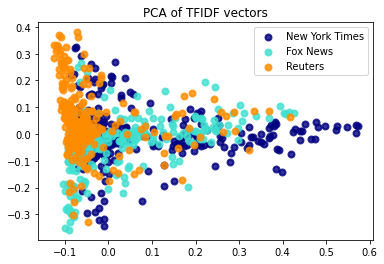

In [45]:
# TODO: answer the above. Remember to include a plot
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

def helper_source_code(source):
    if source == 'New York Times':
        return 0
    elif source == 'Fox News':
        return 1
    else:
        return 2

tfidf_array = np.array(list(full_tfidf.values()))
normalized_array = normalize(tfidf_array)
pca = PCA(n_components=2)
pca.fit(normalized_array)
X_r = pca.transform(normalized_array)

# Getting document sources
id_source = full_data_df[['id', 'publication']]
id_source_coded = np.array([helper_source_code(source) for source in id_source['publication'].tolist()])
source_list = id_source['publication'].unique()

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], source_list):
    idx_to_consider = np.where(id_source_coded == i) 
    plt.scatter(X_r[idx_to_consider, 0], X_r[idx_to_consider, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of TFIDF vectors')

<div class='q_pink'>
    
**2.3c (continued)** Briefly explain your plot above and justify why it makes sense (2-3 sentences).

## My answer

In the plot above we are plotting the TF-IDF embedding vectors for each document and color them based on the newspaper they were published in. From the distribution of the plots, we can see that there is some overlap between Reuters news and Fox News and New York Times. However, ther are significantly more NYT articles spread on the x-axis than Reuters news or Fox News. Additionally, even though there is quite a number of spread articles from Fox across they axis,it seems the majority of them are on the y-axis and the same with Reuters. This shows that there is some distinction in the embeddings of the documents depending on their source but there is no clear distinction between them. This makes sense since no matter if the newspaper is considered to be left, right or center in the political spectrum, they are still reporting the same stories (or at least of the same facts) and so there is bound to be some similarity between the vector embeddings, up to a certain degree, and thats why we see the embeddings clumped together and not cleanly separated.

<div class='q_pink'><b>2.4 Word2Vec from Scratch [45 points total]</b></div>

### Word Representations
So far, we have only considered how vectors can encode similarity at the document level. However, for decades, researchers have aspired to have useful, meaningful _word-level_ representations, too. After all, much of human language is built on piecing together words that have individual, semantic meaning. Thus, it makes sense for models to also try to capture this phenomenon. In 2013, `word2vec` was created, and not only did it yield the most compelling word-level representations to date, but it was the first, main deep learning architecture in NLP that had undeniably strong results.

### PyTorch
Back in 2013, deep learning frameworks (e.g., Theono, Caffe, Torch) existed, but they were difficult to use and had orders of magnitude fewer users/contributors than today. With the power of modern-day PyTorch, we will train word-level representations from scratch on our full news corpus. As we will see, even though we are using a relatively small dataset, we will still be able to do some useful reasoning with the word vectors we obtain.  Part of the purpose of this problem is to introduce you to PyTorch's excellent abstractions (e.g. `Dataset`, `DataLoader`, `Module`, `Optimizer`, etc.). Thus, even though the `word2vec` model that we consider here is a simpler version than the ones provided in third-party libraries, our comprehensive, from-scratch approach is more scalable to future problem sets that involve more complex models (e.g. large language models, neural translation models) -- especially when GPUs are involved.

PyTorch is heavily object-oriented, which means that we will need to create our own versions of its classes in order to solve our specific problems.  You can find a refresher on object-oriented programming in Python [here](https://realpython.com/python3-object-oriented-programming/).   

<div class='q_pink'><b>2.4a Dataset Class [9 points]</b>

Let's start by defining a custom PyTorch dataset class for our news corpus. We will call it the `MooogleDataset`.  Notice in the cell below that it extends the base PyTorch `Dataset`. As a subclass of `Dataset`, `MooogleDataset` is required by contract to implement three methods (you can read more about this [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)):
- A `__init__` method that inputs and stores all the instance variables needed for creating a particular `MooogleDataset` object. As an example, we have implemented this function for you below to take in three arguments:
    - the dictionary `tokenized_texts`
    - the dictionary `vocab`,
    - and an integer `vocab_size`. This will limit the number of unique words that our model is exposed to by only considering the `vocab_size`-most frequent words. Having such a cutoff is standard in deep learning, so that models do not become too large. We will use `vocab_size = 5000`.  Feel free to modify/extend the code in `__init__` if you think that will make implementing the next two functions easier. **Pro tip:** whenever you start to write _any_ code, it's good practice to start small just to ensure everything interacts and behaves correctly -- only once you're sure of such is it worth scaling up and validating the quality of your code. 
- A `__len__` method that tells us how large the dataset is. In our case, this should be the number of documents in the corpus. You need to implement this method.
- A `__getitem__` method that gets a particular item in the dataset. You need to implement this method. The input is `idx`, which is an integer between 0 (inclusive) and the length of the dataset determined by `__len__` (exclusive).  Given `idx`, we want `__getitem__` to (a) find the `idx`-th document (when the documents are sorted in order by id) and (b) return the *integer representation* of that document wrapped in a PyTorch [`Tensor`](https://pytorch.org/docs/stable/tensors.html).  Words with vocabulary indices greater than `vocab_size - 1` are ignored. For example consider the document `["the", "cat", "ate", "the", "yummy", "fish"]` with vocabulary `{"the": 0, "ate": 1, "cat": 2, "fish": 3, "yummy": 4}` and `vocab_size = 4`.  Then, the *integer representation* of the document is `[0, 2, 1, 0, 3]`, since "the"=0, "cat"=2, "ate"=1, "the"=0, "yummy"=3, and "fish"=2, but "yummy" is ignored (i.e., dropped) since its vocabulary index exceeds `vocab_size - 1`.

</div>

In [46]:
from torch.utils.data import Dataset
from torch import Tensor
import torch

class MooogleDataset(Dataset):
    
    def __init__(self, tokenized_texts: Dict[int, List[str]], vocab: Dict[str, int], vocab_size: int):
        self.tokenized_texts = tokenized_texts
        self.vocab = vocab
        self.vocab_size = vocab_size
        
    def __len__(self) -> int:
        return len(self.tokenized_texts.keys())
        
    def __getitem__(self, idx: int) -> Tensor:
        doc_id = list(self.tokenized_texts.keys())[idx]
        curr_doc_text = self.tokenized_texts[doc_id]
        int_rep = []
        for token in curr_doc_text:
            if self.vocab[token] <= self.vocab_size - 1:
                int_rep.append(self.vocab[token])
            else:
                int_rep.append(0)
        return torch.tensor(np.array(int_rep))

As a sanity check, run the test cell below.

In [47]:
# sanity check cell
samp_dataset = MooogleDataset(samp_tokenized, samp_vocab, vocab_size=5000)

# Alias for samp_dataset.__len__()
print(len(samp_dataset)) # should output 3

# Alias for samp_dataset.__getitem__(1)
# should output a tensor that starts with tensor([ 91, 793, 794,  25,  16,  96,  24,  30, 146 ...
print(samp_dataset[1]) 

3
tensor([ 91, 793, 794,  25,  16,  96,  24,  30, 146,   6, 795,  92, 291, 171,
        276,  32,  21, 172,  46, 292,  16, 796,   2,  21,  93,  25, 109,   0,
        172,   4,   5, 797,   6,   0, 798, 799,   0, 800, 801, 802,   3,  56,
        119,  66,  46, 173, 803, 174,  47, 173,   6, 804,  41, 293, 805, 294,
         24,  62,  77, 295,   0,  91, 806, 120,  35, 296, 807, 175,  90,   6,
         32, 808, 297, 809, 121,  80,  58,  15,  25,  30, 298,   0, 299,  92,
        171,  25,  39, 300, 810, 811,   5, 812,  93,  58, 813,  24,  30, 146,
          6,   0, 814, 815,  57,  61,  32,  39, 816,   2, 301,   0, 817,   1,
        818, 284,   2, 819,   0,  92, 820,   3, 149,   1,  46, 821, 822,  39,
        823,  74, 824, 302,  25,  12,  96, 825,   2, 826, 176,   1,   0,  93,
         46, 292, 827,   7,  24,  23,   4, 828, 829, 830,  32, 177,  15, 303,
        304, 305, 122, 306,   2, 307,  11,  21,  93, 175, 831, 832, 833, 834,
        178, 119, 177,  15, 303, 304, 305, 122, 306,   2, 307,

Once you are convinced that your code is correct, simply run (i.e., **DO NOT EDIT**) the cell below to parse the full corpus and output particular samples from it.

In [48]:
# evaluation cell
full_dataset = MooogleDataset(full_tokenized, full_vocab, vocab_size=5000)
print(len(full_dataset)) 
print(full_dataset[12].size())
print(full_dataset[34].size())

1139
torch.Size([984])
torch.Size([1083])


The reason why we went through the trouble of extending PyTorch's `Dataset` class is that we can now use PyTorch's other classes (which are designed to work with `Dataset`) for free! One such class is `DataLoader`. A key concept in deep learning is the idea of "batch" training (i.e., batch gradient descent). For efficiency's sake, we don't want to just have our model train on one document at time (i.e., stochastic gradient descent); we want it to be able to process an entire "batch" of documents in parallel at once. The `DataLoader` implements this idea of generating random batches for us.

<div class='q_pink'><b>2.4b DataLoader Class [3 points]</b>

Carefully read the documentation for `DataLoader` [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). Then, please complete the following tasks:
1. Use the documentation to determine appropriate arguments for instantiating `DataLoader` for our `MooogleDataset` (containing the full document collection) in the code cell below.  We want to make sure that (a) there are 32 documents per batch, (b) the documents used to form the batch are randomly selected each time, and (c) there is never less than 32 documents per batch -- even for the final batch of the dataloader. 
2. One argument that our `DataLoader` definitely needs is `collate_fn`, which we have provided for you in the cell below. As you can see, our `collate_fn` is built on a PyTorch utility function called `pad_sequence`. Read the documentation for `pad_sequence` [here](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pad_sequence.html), and briefly explain in the markdown cell below: (a) what our specific `collate_fn` below is doing; and, (b) why it is necessary when working with NLP data in particular.
</div>

In [49]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

PADDING_IDX = -1
collate_fn = lambda x: pad_sequence(x, batch_first=True, padding_value=PADDING_IDX)

### ASK ABOUT drop_last

# for this code cell, you only need to pass the appropriate arguments into the DataLoader() below
full_dataloader = DataLoader(full_dataset, batch_size=32, shuffle=True, drop_last=True, collate_fn=collate_fn) # TODO: add the correct arguments 

## My answer for part 2


The specific `collate_fn` is taking the current batch and padding every Tensor corresponding to a document with values -1 so that all the tensors have the same length (the length of the longest Tensor in our batch). We need to do this because in our neural architecture, we want all the inputs to the model to have the same dimensions and so we need all the input tensors to be of the same size. 

Once you are confident that both `Dataset` and `DataLoader` were implemented correctly, run the evaluation cell below, which  should run without error and return a PyTorch **Tensor**.  This **Tensor** is the first batch of data in our data loader.

In [50]:
# evaluation cell
batch = next(iter(full_dataloader))
print(batch.size())

torch.Size([32, 2615])


<div class='q_pink'><b>2.4c Understanding the Batch [2 points]</b>
    
What are the dimensions of the `batch` Tensor from the evaluation cell above? What do they represent? Please limit your response to 3-4 sentences.
</div>

In [51]:
# TODO: what are the dimensions of "batch"?
batch_dim = batch.size()
print(batch_dim)
batch[0].shape

torch.Size([32, 2615])


torch.Size([2615])

### Answer 2.4c

The dimensions from the batch Tensor from the cells above are `32 x P` where P is the length of the largest list of tokens in the collection of documents in that batch. This means that we have a batch of 32 Tensors (or vectors since we are talking of Tensors of dimension 1 by n) where the largest Tensor is of Dimension 1 by P. This means that all the other Tensors that have a smaller size (1 by m, where m is less than 1558 because the tokens in those documents were not as many as in the largets) were padded with -1 values in order to reach the dimension 1 by P.


Congrats on making it this far! Now comes the most fun part yet: **implementing the Word2Vec model**. Recall that in the [original Word2Vec paper](https://arxiv.org/pdf/1301.3781.pdf), there were two ways that Word2Vec vectors could be trained (CBOW and skip-gram). We will be implementing the first method, called **Continuous Bag-of-Words** (CBOW). You can find a diagram of CBOW below.

**CBOW Training Algorithm:** We will train a vector (also called an "embedding") $x_i \in \mathbb{R}^D$ for each word $i$ in our vocabulary of size $V$, where $D = 100$ is the size of the vector. To train the embeddings, we will use the documents from our news corpus. Here's the overall process of what we will do:
1. Assume we have a document $d$ of length $T$ represented by a sequence of words $w_1, w_2, \ldots, w_T$.  For each word $w_t$ in this document, we will try to predict $w_t$ based on its surrounding words (also known as its "context") $\mathcal{C}_t = \{w_{t - N}, \ldots, w_{t - 1}, w_{t +1} \ldots, w_{t + N}\}$, where $N = 5$ denotes the context length (meaning the full context will include the 5 words that preceed our given word, and the 5 words that follow it).
2. Compute the "context embedding" $x = \frac{1}{2N} \sum_{w \in \mathcal{C}_t} x_w$ by averaging the word embeddings of all words in the context.  Note that this averaging is done for each dimension of the embedding, so $x \in \mathbb{R}^D$.  Also note that this averaging will eliminate any notion of word order among words in the context, hence "continuous bag-of-words".   
3. Use $x$ as the feature vector in a multi-class logistic regression (softmax) problem to predict the missing word $w_t$ out of $V$ possible words in our vocabulary. 
4. Optimize the word embeddings to minimize the logistic regression loss with batch gradient descent.

![CBOW](cbow.png)


To implement CBOW in PyTorch, we will extend the ``Module`` class (see below).  If you are new to PyTorch, it is expected that this part will be challenging, so don't worry if it takes you a lot of time to get a working implementation.  Definitely check out the excellent PyTorch tutorial on ``Module`` [here](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html). 

<div class='q_pink'><b>2.4d The CBOW Module [20 points]</b>
    
All models in PyTorch are implemented through the ``Module`` class.  Below, write a custom ``Module`` called ``CBOW`` that accomplishes the CBOW algorithm we outlined above. Note, every ``Module`` needs to implement the following two methods:
1. An ``__init__()`` method that initializes the ``Module`` object.  This ``__init__()`` method typically involves three things: (a) Inputing and saving instance variables (similar to what we did in ``MooogleDataset`` above), (b) Defining the layers/architecture of the network based on these instance variables, and (c) Initializing the layers of the network. 
    - For ``CBOW``, we have supplied the signature of the ``__init__()`` method, which includes the instance variables you'll need (e.g. ``context_size``, ``vocab_size``, etc.); your job is to accomplish (a), (b), and (c).  For step (b), you can find a list of PyTorch layers [here](https://pytorch.org/docs/stable/nn.html) [hint: check out ``Embedding`` and ``Linear`` in particular].  For step (c), you can find PyTorch functions for initializing tensors [here](https://pytorch.org/docs/stable/nn.init.html).  **We highly recommend initializing all word vectors as zero vectors and the logistic regression weights uniformly between -1 and +1.**    
   
   
2. A ``forward()`` method that takes a `batch` of data from the `DataLoader` and returns a tuple of two tensors: (a) a tensor of predictions `preds` and (b) tensor of targets `targets`.  
    - For ``CBOW``, the input `batch` is a 2D `LongTensor` (i.e. tensor of integers).  It has dimensions $B \times T$, where $B$ is the batch size and $T$ is the sequence length (i.e. number of words).  Keep in mind that many rows in `batch` will end with a string of -1's to indicate padding.  
    - The first output `preds` is expected to be a 2D `FloatTensor` (i.e. tensor of decimals) with dimensions $M \times V$, where $M$ is the number of (non-pad) words in the batch and $V$ is the size of the vocabulary.  The $(i, j)$-th entry of `preds` will contain CBOW's predicted *log probability* of the $i$-th word in the batch being equal to the $j$-th word in the vocabulary.  
    - The second output `targets` is expected to be a 1D `LongTensor` with length $M$.  The $i$-th entry of `targets` will contain the true identity (i.e. "target") of the $i$-th word in the batch.
    - Writing a `forward()` method that goes directly from `batch` to (`preds`, `targets`) may be quite a challenging task, so we have broken down the problem into subproblems that may be easier to think about.  Each subproblem will involve implementing a different *helper function* (see cell below) that can be used to implement by full `forward()` method.  We encourage you to test your helper functions with sample inputs as you implement them [hint: recall that you can get a sample batch from any `DataLoader` object `dataloader` by running `batch = next(iter(dataloader))`].
        - *Subproblem 1*: Following the **CBOW Training Algorithm** above, the first step is to take the batch of documents ``batch`` along with some integer ``context_size`` and extract a ``contexts`` tensor and a ``targets`` tensor.  This logic will be implemented in the ``split_data()`` helper function below [hint: you may want to make use of [this PyTorch function](https://pytorch.org/docs/stable/generated/torch.Tensor.unfold.html) in your implementation].  Since each batch has multiple documents, each document has multiple contexts, and each context is comprised of multiple words, ``contexts`` will be a 3D tensor with dimensions $B \times C \times N$, where $C$ is the number of contexts [hint: $C$ is a function of $T$ and $N$].  The `targets` tensor will be a 2D tensor with dimensions $B \times C$, since each context has one target word to predict.  In future steps, we will be using the ``contexts`` to predict the ``targets`` (think of ``contexts`` as the "X-variable" and ``targets`` as the "y-variable" in logistic regression).  
        - *Subproblem 2*: The next step has more to do with tensor organization than the actual CBOW algorithm.  If you look inside your ``contexts`` and ``targets`` tensors from the previous subproblem, you'll notice that some of these contain $-1$, which corresponds to padding.  These exist because we needed to pad some of the documents in order to process them as a batch with common sequence length $T$.  However, we don't actually want to train our model on any contexts or targets that contain padding; padding has nothing to do with the CBOW algorithm.  Thus, to filter out the pads, you will flatten the 3D `contexts` tensor and 2D `targets` tensor by implementing the `flatten_tensors()` helper function below.  The outputs should be a flattened 2D `contexts` tensor with dimensions $M \times N$ and a flattened 1D `targets` tensor with dimension $M$, where $M$ is the total number of real (i.e. non-pad) words in the batch [hint: to check your understanding, think about why it must be the case that $M < B \cdot C$].
        - *Subproblem 3*: Assuming that you have implemented both `split_data()` and `flatten_tensors()` correctly, you are now ready to write the `CBOW.forward` method, which will call both of these helpers.  The output of `flatten_tensors()` will yield `contexts` and `targets`.  Following the description of the **CBOW Training Algorithm** above, figure out how to pass `contexts` through the layers you defined in ``CBOW.__init__`` to yield ``preds``, the log probabilities tensor of size $M \times V$.  Then, return ``preds`` and ``targets`` to finish the function.
</div>

In [58]:
from typing import Tuple

from torch.nn import Module, Embedding, Linear, init, ReLU
from torch import LongTensor, BoolTensor, FloatTensor

# Helper function 
def split_data(batch: LongTensor, context_size: int) -> Tuple[LongTensor, LongTensor]:
    contexts = batch.unfold(1, context_size*2 + 1, 1)
    targets = contexts[:,:,context_size]
    contexts = torch.cat((contexts[:,:,:context_size], contexts[:,:,context_size + 1:]),2)
    return contexts, targets
    
# Helper function 
def flatten_tensors(context: LongTensor, target: LongTensor, padding_idx: int) -> Tuple[LongTensor, LongTensor]:
    trimmed_contexts = []
    trimmed_targets = []
    for pair in zip(context, target):
        curr_context = pair[0]
        curr_target = pair[1]
        ctxt_boolean_mask = ((curr_context == padding_idx).nonzero(as_tuple=True)[0])
        targ_boolean_mask = ((curr_target == padding_idx).nonzero(as_tuple=True)[0])
        if ctxt_boolean_mask.numel() > 0 and targ_boolean_mask.numel() > 0:
            first_pad_idx_ctxt = ctxt_boolean_mask.min(dim=0).values.item()
            first_pad_idx_targ = targ_boolean_mask.min(dim=0).values.item()
        else:
            first_pad_idx_ctxt = curr_context.shape[1]
            first_pad_idx_targ = len(curr_target)
        cutting_idx = min(first_pad_idx_ctxt, first_pad_idx_targ)
        trimmed_contexts.append(curr_context[:cutting_idx, :])
        trimmed_targets.append(curr_target[:cutting_idx])
    target = torch.cat(trimmed_targets, dim=0)
    context = torch.cat(trimmed_contexts, dim=0)
    return context, target

class CBOW(Module):
    
    def __init__(self, context_size: int, vocab_size: int, vector_size: int, padding_idx: int):
        super().__init__()
        self.context_size = context_size
        self.vocab_size = vocab_size
        self.vector_size = vector_size
        self.padding_idx = padding_idx
        
        self.embeddings = Embedding(self.vocab_size, self.vector_size)
        torch.nn.init.zeros_(self.embeddings.weight)
        self.linear1 = Linear(self.vector_size, self.vocab_size)
        torch.nn.init.uniform_(self.linear1.weight, a=-1, b=1)
        
    
    def forward(self, batch: LongTensor) -> Tuple[FloatTensor, LongTensor]:
        contexts, targets = split_data(batch, self.context_size)
        contexts, targets = flatten_tensors(contexts, targets, self.padding_idx)
        
        embeds = self.embeddings(contexts)
        avg_embeds = torch.mean(embeds, dim=1)
        out = self.linear1(avg_embeds)
        log_probs_2 = torch.nn.functional.log_softmax(out, dim=1)
        return log_probs_2, targets
        

Once you are confident with your `CBOW` implementation, run the following cell to test (a) the initialization of the model and (b) the `forward` function on a random batch from the dataloader.  It should run without error if you have implemented everything correctly.

In [59]:
batch = next(iter(full_dataloader))
contexts, targets = split_data(batch, 5)
contexts, targets = flatten_tensors(contexts, targets, -1)
print(contexts.shape, targets.shape)

torch.Size([20282, 10]) torch.Size([20282])


In [60]:
# evaluation cell
batch = next(iter(full_dataloader))
model = CBOW(context_size=5, vocab_size=5000, vector_size=100, padding_idx=PADDING_IDX)
preds, targets = model(batch) # Alias for model.forward(batch)
print(preds.shape, targets.shape)
print(preds, targets)

torch.Size([27095, 5000]) torch.Size([27095])
tensor([[-8.5708, -8.6026, -8.6035,  ..., -8.6127, -8.5277, -8.4472],
        [-8.5708, -8.6026, -8.6035,  ..., -8.6127, -8.5277, -8.4472],
        [-8.5708, -8.6026, -8.6035,  ..., -8.6127, -8.5277, -8.4472],
        ...,
        [-8.5708, -8.6026, -8.6035,  ..., -8.6127, -8.5277, -8.4472],
        [-8.5708, -8.6026, -8.6035,  ..., -8.6127, -8.5277, -8.4472],
        [-8.5708, -8.6026, -8.6035,  ..., -8.6127, -8.5277, -8.4472]],
       grad_fn=<LogSoftmaxBackward>) tensor([ 138,    0,  228,  ..., 2597, 3563, 1076])


<div class='q_pink'><b>2.4e Training the Model [9 points]</b>
    
Great! Now that we have a Dataset, a DataLoader, and a model, we can start training the model! Please read steps 3 and 4 of [this tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). In the tutorial, you'll notice that training will require three steps:
- Choosing an [optimizer](https://pytorch.org/docs/stable/optim.html) (we recommend [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam) with learning rate 0.001, but feel free to experiment)
- Choosing a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
- Writing a training loop (i.e. step 4 in the tutorial).  In the training loop, you'll have to set how many times to iterate through the dataloader; this is also called the *number of epochs*.  For starters, 1-2 epochs should be enough to see some decent results in the next section, but feel free to train for more epochs to see if you can get even better word vectors. **In your training loop, please print out your loss every 10 batches.** This is insightful to the user (and grader).

For reference, our solution runs 3 epochs in 2 minutes 45 seconds (on a 2019 Macbook Pro w/ a 2.6 GHz CPU and no GPU).

In the cell below, write and run code to train your model.
</div>

In [61]:
%%time

from torch.optim import Adam
from torch.nn import NLLLoss

# TODO: train the model!
loss_function = NLLLoss()
optimizer =  Adam(model.parameters(), lr=0.0001)
epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    for i, batch in enumerate(full_dataloader):
        
        preds, targets = model(batch)
        loss = loss_function(preds, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 10 == 0 and i > 0:
            print('Epoch %d, iteration %5d, loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/10))
            running_loss = 0.0
    
print("Finished Training")

print(preds, targets)
print(preds.shape, targets.shape)

Epoch 1, iteration    11, loss: 9.380
Epoch 1, iteration    21, loss: 8.517
Epoch 1, iteration    31, loss: 8.508
Epoch 2, iteration    11, loss: 9.343
Epoch 2, iteration    21, loss: 8.483
Epoch 2, iteration    31, loss: 8.472
Epoch 3, iteration    11, loss: 9.302
Epoch 3, iteration    21, loss: 8.445
Epoch 3, iteration    31, loss: 8.433
Epoch 4, iteration    11, loss: 9.257
Epoch 4, iteration    21, loss: 8.404
Epoch 4, iteration    31, loss: 8.391
Epoch 5, iteration    11, loss: 9.207
Epoch 5, iteration    21, loss: 8.358
Epoch 5, iteration    31, loss: 8.344
Finished Training
tensor([[-7.7839, -8.4109, -8.4598,  ..., -8.6347, -8.5032, -8.4832],
        [-7.8120, -8.4194, -8.4595,  ..., -8.6307, -8.5091, -8.4837],
        [-7.7867, -8.4071, -8.4596,  ..., -8.6292, -8.5116, -8.4879],
        ...,
        [-7.8819, -8.4074, -8.4111,  ..., -8.6501, -8.5301, -8.4915],
        [-7.8402, -8.3997, -8.4012,  ..., -8.6420, -8.5292, -8.5025],
        [-7.8268, -8.4080, -8.4304,  ..., -8.6369

Great job on writing Word2Vec from scratch!  Hopefully you learned a lot about the inner workings of PyTorch.  This will go a long way in preparing us for training more complicated models in the future.

<div class='q_pink'><b>2.4f Evaluate the word2vec embeddings [4 points]</b>

Now, let's see if the Word2Vec vectors we trained were any good.  Complete the following exercise:
1. Extract the Word2Vec embeddings for each word from your model and print the shape of this data structure.
2. For each word $w$ in the list ["man", "thursday", "senate", "jersey", "injured", "republican"], find and display the five other words whose vectors have the highest **cosine similarity** with the vector for $w$.  Also, display their cosine similarities.  Are the results in-line with what you would expect?  Why or why not?
3. Explore the embeddings yourself and find one word with not-so-sensible neighbors.  Why might this be the case?

For clarity, we will explicitly ask you each of these questions in separate prompts below.
</div>

<div class='q_pink'>

**1.** Extract the Word2Vec embeddings for each word from your model and print the shape of this data structure.
</div>

In [62]:
# TODO: answer the above

## Ask if just extracting the weights is enough for this part.
embedding_weights = model.embeddings.weight
print("The shape of the embeddings for each word is ", embedding_weights.shape)

The shape of the embeddings for each word is  torch.Size([5000, 100])


## Shape of embeddings

The shape of the embeddings is 5000 by 100.

<div class='q_pink'>
 
**2.** For each word  𝑤  in the list ["man", "thursday", "senate", "jersey", "injured", "republican"], find and display the five other words whose vectors have the highest cosine similarity with the vector for  𝑤 . Also, display their cosine similarities.
</div>

In [63]:
## HElper functions
def cosine_similarity(vec_a, vec_b):
    result = np.dot(vec_a, vec_b)/(np.linalg.norm(vec_a)*np.linalg.norm(vec_b))
    return result

def most_similar_embs(word1_idx, embeddings, limit=5):
    word1_emb = embeddings[word1_idx]
    word1_emb_dict: Dict[int, float] = {}
    for word_idx, embs in enumerate(embeddings):
        word1_emb_dict[word_idx] = cosine_similarity(word1_emb.detach().numpy(), embs.detach().numpy())
    sorted_vocab_dict = {k: v for k,v in sorted(word1_emb_dict.items(), key=lambda item: item[1], reverse=True)}
    return list(sorted_vocab_dict.items())[:limit]
    

# TODO: answer the above
idx_per_word = [full_vocab[word] for word in ['man', 'thursday', 'senate', 'jersey', 'injured', 'republican']]
rev_full_vocab = {idx: word for word, idx in full_vocab.items()}

for idx in idx_per_word:
    sorted_vocab_dict = most_similar_embs(idx, embedding_weights, limit=6)
    #print(sorted_vocab_dict)
    print(f"For word \'{rev_full_vocab[idx]}\' the five words with closest vectors are: ")
    for sorted_itms in sorted_vocab_dict[1:]:
        print(f"\'{rev_full_vocab[sorted_itms[0]]}\' with similarity {sorted_itms[1]}")
    print("\n")

For word 'man' the five words with closest vectors are: 
'worked' with similarity 0.9776332974433899
'person' with similarity 0.9764465093612671
'prosecutor' with similarity 0.9758427739143372
'later' with similarity 0.974678099155426
'woman' with similarity 0.9728676080703735




<ipython-input-63-569aacd3474f>:3: RuntimeWarning: invalid value encountered in float_scalars
  result = np.dot(vec_a, vec_b)/(np.linalg.norm(vec_a)*np.linalg.norm(vec_b))


For word 'thursday' the five words with closest vectors are: 
'tuesday' with similarity 0.9904566407203674
'monday' with similarity 0.9874411821365356
'friday' with similarity 0.9867036938667297
'saturday' with similarity 0.985265851020813
'sunday' with similarity 0.9826511740684509


For word 'senate' the five words with closest vectors are: 
'authorities' with similarity 0.9828258156776428
'helped' with similarity 0.9827529191970825
'inside' with similarity 0.982289731502533
'during' with similarity 0.981846272945404
'before' with similarity 0.9816762208938599


For word 'jersey' the five words with closest vectors are: 
'york' with similarity 0.9545624256134033
'hampshire' with similarity 0.9491590857505798
'lows' with similarity 0.9037734270095825
'mexico' with similarity 0.8859582543373108
'recorded' with similarity 0.8768290877342224


For word 'injured' the five words with closest vectors are: 
'killed' with similarity 0.9667063355445862
'shot' with similarity 0.9612376689910889

<div class='q_pink'>
    
**2 (continued).** Are the results in-line with what you would expect? Why or why not? (2-3 sentences).
</div>

## MY answer

This results are in-line with what I expect. We only trained the network for 3 epochs and so we expect results that make sense, but definitely not the best. In particular, we can see that for the words 'man', 'thursday', 'senate', 'jersey', 'injured', 'republican' there are at least 2 (sometimes 3) words that are clearly related to them. The words related with each of the previous ones change after each iteration, but in general, we can see that for the word "thursday" we see at least 4 very related words (days of theweek), for "man" we usually see "woman" or "boy", for "jersey" we tend to see at least 2 names of cities/countries and same for "injured", we see words related to accidents. We expected these results since our network show a loss that was decreasing and after inspecting the inputs in our network, every piece was moving as expected. 

<div class='q_pink'>

**3.** Explore the embeddings yourself and find one word with not-so-sensible neighbors.
</div>

In [64]:
idx_per_word = [full_vocab[word] for word in ['people']]
rev_full_vocab = {idx: word for word, idx in full_vocab.items()}

for idx in idx_per_word:
    sorted_vocab_dict = most_similar_embs(idx, embedding_weights, limit=6)
    #print(sorted_vocab_dict)
    print(f"For word \'{rev_full_vocab[idx]}\' the five words with closest vectors are: ")
    for sorted_itms in sorted_vocab_dict[1:]:
        print(f"\'{rev_full_vocab[sorted_itms[0]]}\' with similarity {sorted_itms[1]}")
    print("\n")

For word 'people' the five words with closest vectors are: 
'those' with similarity 0.989790678024292
'all' with similarity 0.9872409105300903
'some' with similarity 0.9871735572814941
'many' with similarity 0.9871664047241211
'out' with similarity 0.9852626323699951




<ipython-input-63-569aacd3474f>:3: RuntimeWarning: invalid value encountered in float_scalars
  result = np.dot(vec_a, vec_b)/(np.linalg.norm(vec_a)*np.linalg.norm(vec_b))


From  the exploration, we found that the word "people" has not-so-sensible neighbors.

<div class='q_pink'>
    
**3 (continued).** Why might this be the case? (1-2 sentences)
</div>

## My answer

This happens because "people" is a very general word and througout the training contexts, it might appear close to many different words. Thus, when we train the embeddings, we might find that several random words are ranked to be close to the word "people" and so these have the high similarity with the word "people"

<div class='q_pink'><b>2.5 From Word2Vec to Doc2Vec [4 points total]</b></div>

OK, time to get back to Mooogle. The cows appear to be growing restless. Hopefully you've seen how training Word2Vec gives us nice word vectors that capture some knowledge about usage and meaning. However, what we ultimately care about in this information retrieval problem is recommending good _documents_. Thus, we will try to use Word2Vec to do document recommendation for Mooogle.

Word2Vec provides a vector *for each word*, yet Mooogle requires a vector *for each document*. How do we go from word vectors to document vectors? One very simple way is to define the document vector as the average of word vectors for all the words in the document.  

Unfortunately, our in-house Word2Vec vectors from the previous section were not trained on enough data.  Thus, they will not lead to good document vectors. However, we can import some pretrained Word2Vec vectors that were trained on many documents from Google News using the awesome [gensim library](https://radimrehurek.com/gensim/index.html). Run the following code to download these vectors. **WARNING:** This will use 1.6 gb of hard drive space and will thus take some time to download.

In [65]:
# Run if 'gensim' is not installed
!pip install gensim

In [ ]:
import gensim.downloader

gnews = gensim.downloader.load('word2vec-google-news-300')
gnews_vecs = gnews.vectors
gnews_vocab = gnews.key_to_index

<div class='q_pink'><b>2.5a doc2vec [0 points]</b>
    
**Note:** This section has already been implemented for you. Your job is to read the code and make sure you understand what's happening.
    
As the cell above suggests, Google News has its own vectors and vocabulary. Below, we use these objects, along with your `tokenized_texts` to implement the following function `run_doc2vec()`, which assigns a vector to every document based on the Word2Vec word vectors. If a word in the corpus happens to be missing from the Google News vocabulary, we skip it when computing document vectors [note: the denominator in the average is adjusted accordingly].

The function accepts as inputs:
- the output from `load_corpus()` (e.g., `samp_tokenized`)
- `gnews_vocab`
- `gnews_vecs`

It return a dictionary, just like `create_TFIDF()`, whereby the keys are the doc ids and the values are the corresponding vectors.
</div>

In [ ]:
def run_doc2vec(tokenized_texts: Dict[int, List[str]], vocab: Dict[str, int], vecs: np.ndarray) -> Dict[int, np.ndarray]:
    doc_vecs = {}
    for doc_id, doc in tokenized_texts.items():
        doc_vecs[doc_id] = np.mean([vecs[vocab[word]] for word in doc if word in vocab], axis=0)
    return doc_vecs

Execute the following cells to make sure that `run_doc2vec` is working correctly.

In [ ]:
# sanity check cell
samp_doc2vec = run_doc2vec(samp_tokenized, gnews_vocab, gnews_vecs)

Once you are convinced that the code is correct, simply run (i.e., **DO NOT EDIT**) the cell below to convert the dataset to doc2vec format.

In [ ]:
full_doc2vec = run_doc2vec(full_tokenized, gnews_vocab, gnews_vecs)
print(len(full_doc2vec[20679]))
print(full_doc2vec[189708])

<div class='q_pink'><b>2.5b Run Moogle [4 points]</b>
    
We now produce recommendations based onthe Doc2Vec embeddings, and compare them to those produced by TF-IDF. **You do not need to write any code in the cell below. Simply answer the subsequent question.**
</div>

In [ ]:
doc2vec_df = pd.DataFrame(full_doc2vec).T
doc2vec_norms = np.sqrt((doc2vec_df ** 2).sum(axis=1))
doc2vec_cosines = doc2vec_df @ doc2vec_df.T / doc2vec_norms.values / doc2vec_norms.values.reshape(-1, 1)
doc2vec_cosines

# Get top 5 recommendations for doc2vec
doc2vec_recs = doc2vec_cosines.apply(lambda x: pd.Series(x.nlargest(6).index[1:])).T
# Display titles of recommendations
for doc_id in [189496, 20398, 20516, 189657]:
    print('**** Query ****')
    print(titles.loc[doc_id])
    print('**** Doc2Vec Recommendations ****')
    for rec_id in doc2vec_recs.loc[doc_id]:
        print(titles.loc[rec_id])
    print('**** TF-IDF Recommendations ****')
    for rec_id in tfidf_recs.loc[doc_id]:
        print(titles.loc[rec_id])
    print('\n')

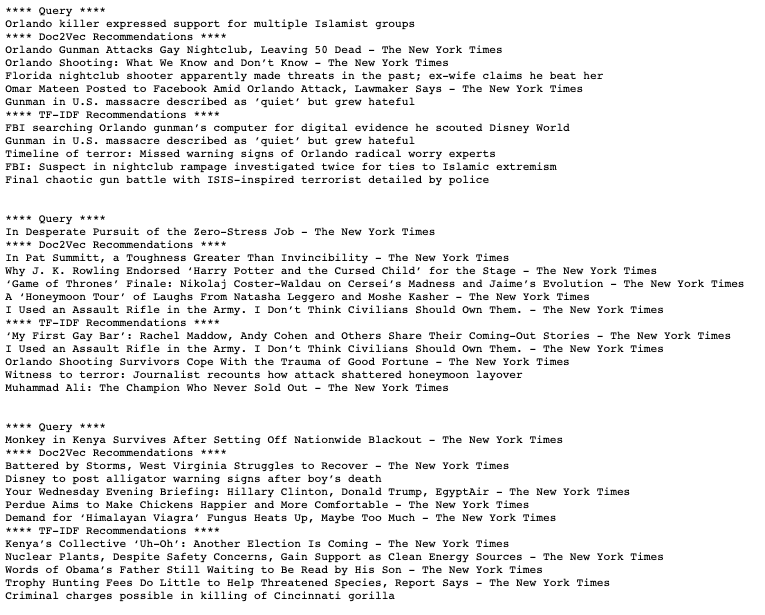

<div class='q_pink'> How do our Doc2Vec recommendations compare to TF-IDF's? Why? Are Doc2Vec recommendations good overall? What are some alternative ways to adapt word2vec for documents? (At least 2-3 sentences.)
</div>

## My answer

For the results above we see that overall the TF-IDF recommendations are in general better than the Doc2Vec (D2V) recommendations. I say this because for the first query, the D2V recommendations all are related to a gunman and shooter in Florida but the recommendations miss the part that the in the query the shooter showed support from Islamist groups and so none of the recommendations were related to this religion. In the case of the 2nd and 3rd query, the recommendations from D2V are pretty mcuh not related to the query at all. In comparison,k The TF-IDF recommendation sin the first and third query are somewhat related to the query. In particular, in the first query, all the TF-IDF recommendations ar related to a Flroida/orlando gunman and top ofthat there is a recommendation of a storie showing some relation between the shooter and ISIS and Isamic extremism. This shows, that at least for the first query, the TF-IDF recommendations are superior to the D2V recommendations. For the third query, the TF-IDF recommendations are somewhat related to the query, ther are recommendations on a story about Kenya, about hunting, about gorillas, about blackouts and even Obama's family (which is frmo Kenya I believe). This is far superior to the recommendations from the Doc2Vec. In the second query, both recommendations are equally bad. This leads us to conclude that the TF-IDF recommendations are better than the Doc2Vec. In general, I believe TF-IDF embeddings are better because these embeddings are in some sense considering the frequency of words in a document and relates these frequencies to how much a word appears in all the documents. Thus, in some sense, we have an embedding where the entries quantitify a measure of how frequently a word appears in the document (weighted by a measure of much that word appears in all the documents), which intuitively seems more useful to find related documents since intuitivelythe embeddings of related documents might have similar words with similar high measures appearing in the embeddings. In comparison, the D2V embeddings are averages of the word embeddings that appear in that document. By taking the average of the word embeddings, we might be washing off the signal that specific words might be given in that document and so when we want to relate different D2V embeddings we are basically trying to relate random numbers obtained from the average of the embedddings. Because of this reasoning and the results from the query above,we can say that the D2V recommendations were not very good.

Alternatively to just the average of the Word2Vec embeddings, to obtain an embedding for the documents we can consider stacking all the words embeddings in a matrix for each document and perhaps we could measure the distance between matrices using matrix norms. This might give better results in terms of similarities of docs but might have an additional computational burden.



<div class='header_green'>
    
# 3. RESEARCH [20 points]

</div>

As we build a foundation in NLP, it's also important to also see what the latest, cutting-edge work (research) looks like. It's incredibly worthwhile to learn about the types of problems people work on, their methodology and approach to the problem, the datasets they work on, the issues they raise, and the solutions they posit. The field moves incredibly fast, but the __approach__ to ML/NLP research is relatively stable -- different types of papers are accepted as the years progress, but that's a different story.

We want to help you get practice reading research papers, which mostly entails thinking critically about the work, being able to discern the main takeaways/conclusions, and to reflect on the work in a meaningful way.

<div class='q_green'><b>3.1: Read an NLP research paper [0 points]</b>
    
Select and read a paper that was published in ACL, NAACL, EMNLP, or COLING in 2020 or 2021. You can find a list of such published papers by searching Google (Mooogle can't help you here), a la "ACL 2020 accepted papers". For this assignment, you are allowed to pick either a short paper (4-5 pages) or long paper (8-9 pages), **but you must not select a workshop paper**. List below the name of the paper, authors, venue, and year published.

While I highly encourage you to look at the aforementioned venues to find a paper that interests you, alternatively, you could select one of the follow three papers:

- Famous alternative, follow-up to word2vec:
> GloVe: Global vectors for word representation. Jeffrey Pennington, Richard Socher, and Christopher Manning. EMNLP 2014.

- Influential paper on probing, and the title is a reference to a famous quote "You can't cram the meaning of a whole sentence into a %&!$# vector\":
> What you can cram into a single vector: Probing sentence embeddings for linguistic properties. A Conneau, G Kruszewski, G Lample, L Barrault, M Baroni. ACL 2018.

- Not as famous, but a solid approach to an important and interesting problem:
> Improving Vector Space Word Representations Using Multilingual Correlation. Manaal Faruqui and Chris Dyer. EACL 2014.

</div>

1st paper: Title: "Prevent the Language Model from being Overconfident in Neural Machine Translation", Authors: Mengqi Miao, Fandong Meng, Yijin Liu, Xiao-hua Zhou, Jie Zhou, Venue: ACL 2021, Year: 2021

<div class='q_green'><b>3.2: Problem? [2 point]</b> What is the problem that it is trying to address? In other words, what is it trying to solve? (2-3 sentences)
</div>

This paper is proposing a solution to solve the hallucination problem in Neural Machine Translation (NMT), basically the problem that NMT generates fluent but inadqueate translations (w.r.t to the source). In more detail, the paper is trying to address the problem that the NMT models puts too much weight on the fluency of the partial translation and neglects certain segments of the source mateiral (this is the overconfidence of the Language Model (LM).  

<div class='q_green'><b>3.3: Solution? [2 point]</b> At a very high-level, what was their solution? (2-3 sentences). Here, you don't have room to go into the small details (e.g., about the model), so you'll need to summarize the most important elements that comprised the solution.
</div>

To solve this problem, the authors defnie an indicator of the overconficdence of the LM, which is the *Margin between NMT and LM*. Based on this margin, they propose two distinct objectives, the first one is the Margin-based Token-level Objective (MTO) to maximize this Margin or the Margin-based Sentence-levelObjecive (MSO) which is used to get rid of harmful data (a mismatch between target sentencences and source sentences, they do not correspondo to each other).

<div class='q_green'><b>3.4: Data? [2 points]</b> What dataset(s) did they use? Are they freely available? What's the size of the data? (2-3 sentences)
</div>

They use the datsets the WMT14 English-to-German (with 4.5 Millino sentence pairs) , WMT19 Chinese-to-English (20.2 Million sentence pairs) and the WMT14 English-to_french (36 Million sentence pairs) datasets which are public.

<div class='q_green'><b>3.5: Model [2 points]</b> Very related to the 'solutions' question, describe here any models that they used, and what made it effective (2-3 sentences)
</div>

The main changes in regular NMT models come in the development of new Loss functions and the deveopment of the Margin between NMT and LM. Thus they use a Transformer (based on Vaswani et.al. 2017), keeping the architecture close to the original one but replacing the decoder of the transformer with the LM architecture and ecluding some cross-attention layers. Furthermore, to reduce the number of parameters, they shared the embedding layer and pre-softmax linear transformation of the transformer with the NMT model. The authors used this model because this one of the benchmark models in NMT and so any improvements designed in this problem need to surpass the results obtain with the vanilla Transformer.|

<div class='q_green'><b>3.6: Results? [2 points]</b> What are their main results? (~2 sentences)
</div>

On the English-German dataset, the NMT with MSO and MTO loss functions outperform the classical transformer architecture, MRT, Dual and Multi-taskarchitectures presented before.The model presented here achieved a 28.47% and 28.58% BLEU scores (improvements of 1.25 and 1.36 percentage points) respectively and with respect to the baseline which was the Transformer Model  by Vaswani. For the English-French and Chinese-English datasets there were also improvements with respect to the baseline (Transformer). In particular, with MTO and MSO the proposed approach had an improvement of 0.49 and 0.63 percentage points of BLEU score respectively in the English-French dataset. In the Chinese-English datset, with MTO and MSO, the proposed approach had an improvement of 1.19 and 1.50 percentage scores respectively.  

<div class='q_green'><b>3.7: Strengths? [2 points]</b> List 2-3 strengths of the paper
</div>

    1) They provide a concise but solid background of the topic and problem to understand better their development.
    2) The paper is very clear and mathematically clean when explaining how they are defining the new loss functions and how they define dthe MTO and MSO.
    3) The paper is very thorough in exploring the analysis of its results and clearly identifies the reasons of the improvements to its proposed losses.

<div class='q_green'><b>3.8: Weaknesses? [2 points]</b> Although you may be new to this problem and all of its content, try to list 2-3 weaknesses of the paper (anything that you think could strengthen the paper is sufficient).
</div>

    1) I think a paper should always include future directions that readers of the paper could use to work on related problems, I think this paper could use some of that.
    2) When defining the margin functions, the paper was very loose in that choice. I think there could have been more mention of why those choices or at least say there wasn't reason if there was none

<div class='q_green'><b>3.9: Evaluation [2 points]</b>
    
How would you evaluate this paper in terms of:
- scientific contribution
- effectiveness to solve the problem
- how convincing it was.
    
Give each of these elements a score from 1-10 (10 is best). No word explanation necessary.
</div>

    * Scientific Contribution: 8
    * Efffectivenes to solve the problem: 8
    * How convincing it was: 7

<div class='q_green'><b>3.10: Research Ideas [4 points]</b> Think of 1-2 research ideas that you have based on this paper. It doesn't have to be grand; most research is very incremental. Specifically, your research idea should have a concrete __question__ that you're aiming to answer. List it below. 
</div>

    1) This paper, and its proposals, were implemented on top of the vanilla Transformer architecture by Vaswani providing promising results. There are previous work (Incorporating BERT into Neural Machine Trnaslation, Zhu, Jinjua, et.al.) attempting to implement BERT into NMT. Could we rethink the ideas presented in this paper to work in a BERT-based NMT model? How would such a model fare in comparison to the Vaswani Transformer model and the results presented in this paper?
    2) Within the paper, the authors defined three level of the margin between NMT and LM: big, medium and small. Is there a way to define these boundaries more formally? Do these boundaries depend on the data presented? Would it be possible to learn the threshold between these boundaries based on the training data?

<div class='q_green'><b>BONUS POINTS [5 points]</b> I mention the full details in the syllabus on the course website. However, in short, these bonus points cannot bring one's grade to exceed 100. That is, if someone received a 97 on this homework, doing this bonus could allow their grade to reach 100 points. If the person had an 83 on the homework, then the most they could achieve is an 88.
    
The task: read another research paper (allowed to be a Short Paper) and answer the same questions again. Please copy and paste all of the questions below.
</div>

2nd paper: "How effective is BERT without word ordering?Implications for lagnuage understanding and data privacy", Hessel, Jack, Schofield Alexandra, ACL 2021, 2021

## Problem? [2 point] What is the problem that it is trying to address? In other words, what is it trying to solve? (2-3 sentences)

The paper is trying to answer the question of, quantifiably, how resilient are token representations and activation layers within BERT to shuffled input. Mainly the authors want to quantify the resiliency of BERT (or Bag of Words BERT, BoW-BERT) when the inputs order is shuffled and what could these resiliency to shuffled input be useful for other applications in the differential privacy space.


## Solution? [2 point] At a very high-level, what was their solution? (2-3 sentences). Here, you don't have room to go into the small details (e.g., about the model), so you'll need to summarize the most important elements that comprised the solution.

This was more of a survey paper, so the authors presented the results of their experiments as an answer to their question. In particular, the authors studied the performance of pre-trained MLM (like BERT or BoW-BERT) on a collection of English-language undertsanding benchmarks (GLUE). In particular, the researchers defined two new metrics to investigate the resiliency fo the MLM models to shuffle input: Token Idenfitifiability (which measures the similarity of BERT's represtnation of a word token in a sentence $x$ and the token in its shuffled counter part $x'$, and Self attention distanc which measures if BERT attends to similar tokens for each token in $x$ and its shuffled version $x'$ regardless of the order. Additionally, besides testing BERT on the GLUE tasks, the authors did a test of classification on sensitive texts using differential privacy models.

## Data? [2 points] What dataset(s) did they use? Are they freely available? What's the size of the data? (2-3 sentences)

The authors used 100 sentences for each training set of 8 GLUE tasks for a totalk of 800 sentences, additionally, the authors sample 32 random permutations per sentence. The GLUE tasks are freely available and the datasets within it all contain 422.7 sentences. 

## 3.5: Model [2 points] Very related to the 'solutions' question, describe here any models that they used, and what made it effective (2-3 sentences)

To make their analysis, the authors used the BoW-BERT model since that was the model based on BERT that allowed th eresarchers tu ose bag-of-words representations for their experiments. Additionally, it has been shown that Bo-BERT ignorse syntax on the input, but it has never been tested how resistant this model could be to shuffled input.


## 3.6: Results? [2 points] What are their main results? (~2 sentences)

The authors conclude is that BoW-BERT is one of the strongest baselines for language understanding tasks (even when the input is shuffled) since the results from the GLUE tasks are at within  5% accuracy of the non-shuffled versions of BERT and areat least 2% than other bag-of-words methods (like CBOW GLoVe).Furthermore, the authors concluded that BoW-BERT  is a strong option option (stronger than CBOW, CBOW GloVE, Unigram TFIDF) for classifying sensitive documents when the the documents are short.

## 3.7: Strengths? [2 points] List 2-3 strengths of the paper

    1) Has suggestions for future work.
    2) Did a fine job of explaining certain details of their choices, why use BoW-BERT instead of just BERT.

## 3.8: Weaknesses? [2 points] Although you may be new to this problem and all of its content, try to list 2-3 weaknesses of the paper (anything that you think could strengthen the paper is sufficient).
    
    1) (Perhaps its just a me thing) I enjoy when papers have a previous work/background section, since that allows people not so familiar with the topic to have a common backgroun with the authors, maybe should include that.
    2) I feel te experiments could have been explained a bit better, in particular how the results differ between a model with no shuffled input vs the same model with shuffled input.
    3) The authors put some effort in explaining the metrics of Token identifiability and Self attention Distance but didn't mention the terms later on in the results of the analysis.

## 3.9: Evaluation [2 points]

    * Scientific Contribution: 6
    * Efffectivenes to solve the problem: 7
    * How convincing it was: 6


## 3.10: Research Ideas [4 points] Think of 1-2 research ideas that you have based on this paper. It doesn't have to be grand; most research is very incremental. Specifically, your research idea should have a concrete __question__ that you're aiming to answer. List it below.


    * This work was based on the English language where syntax and grammatical rules are different than in other languages. Should we expect similar results for a similar analysis using other languages? Perhaps with German, chinese or spanish?
    * We now know that BoW-BERT is resilient to shuffled input, but can we go deeper. What are the layers/sections of the BoW-BERT architecture that are responsible for the model's resiliency to shuffled input? Can we use those layers to design stronger architectures that could prevent issues with security?





<div class='header_blue'>
    
# 4. SELF-REFLECTION [0 points]

</div>

<div class='q_blue'><b>4.1: Self-reflection and Feedback [0 points]</b>

Are you thriving in the course? Are there elements that are particularly confusing to you? I want everyone to be and feel fully supported. Toward this, I strongly urge you all to think critically about your own learning and efforts. Please provide us with feedback about how you're doing in the course and if there's anything further or different we can do to better assist your learning. I want everyone to give their earnest account, so the form is completely anonymous.

</div>

[Anonymous Self-Reflection and Feedback Form](https://forms.gle/3LT6UfhtCtqp2G7X9)